In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using LAR
using LAR.Node

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/preprocessing.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


fft_expand (generic function with 1 method)

# Generate artificial data

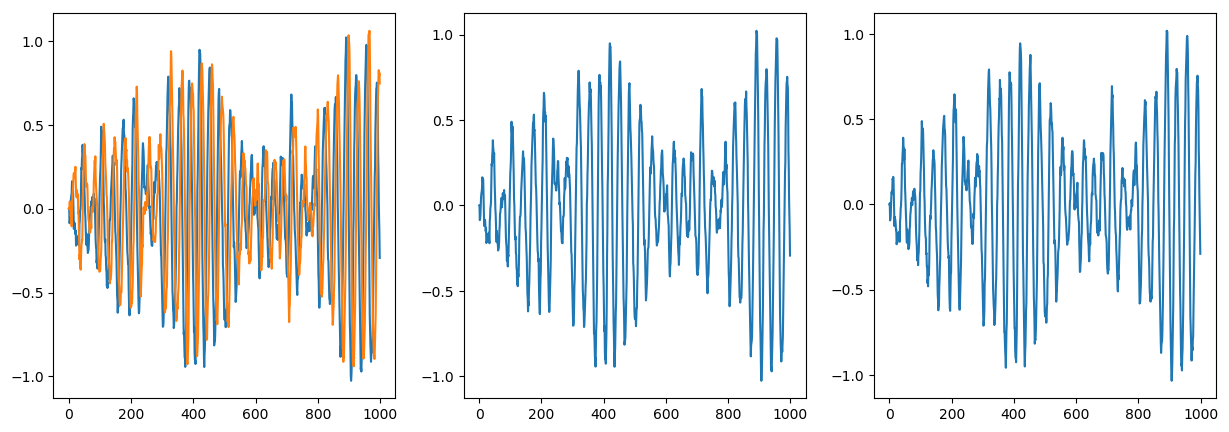

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006139E4A8>

In [2]:
# signal statistics 
N = 1000
fs = 100

# process parameters
œÅ = 0.995
f = 3
œÉ_p = 0.04
œÉ_n = 0.01

# create signal (option 1)
z = Array{Complex{Float64},1}(undef, N)
x = Array{Float64,1}(undef, N)
y = Array{Float64,1}(undef, N)
z[1] = 0 + 0*1im
x[1] = 0
y[1] = 0
for n = 2:N
    z[n] = œÅ*z[n-1]*exp(1im*f/fs*2*pi) + rand(Normal(0, œÉ_p)) + rand(Normal(0, œÉ_p))*1im
    x[n] = real(z[n])
    y[n] = rand(Normal(x[n], œÉ_n))
end

_, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].plot(real(z))
ax[1].plot(imag(z))
ax[2].plot(x)
ax[3].plot(y)


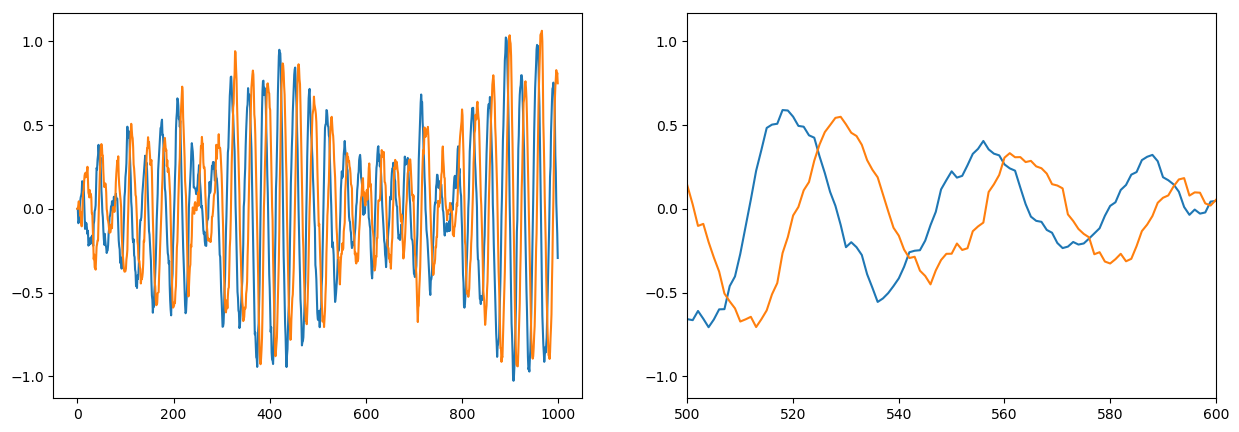

(500, 600)

In [3]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(real(z))
ax[1].plot(imag(z))
ax[2].plot(real(z))
ax[2].plot(imag(z))
ax[2].set_xlim(500, 600)

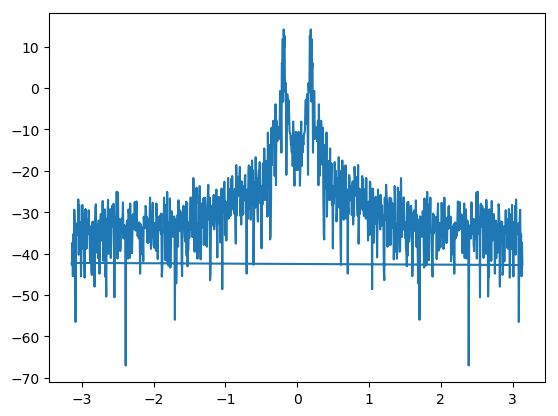

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006272B978>

In [4]:
plt.plot(FFTW.fftfreq(length(x), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(x)).^2)./length(x)))

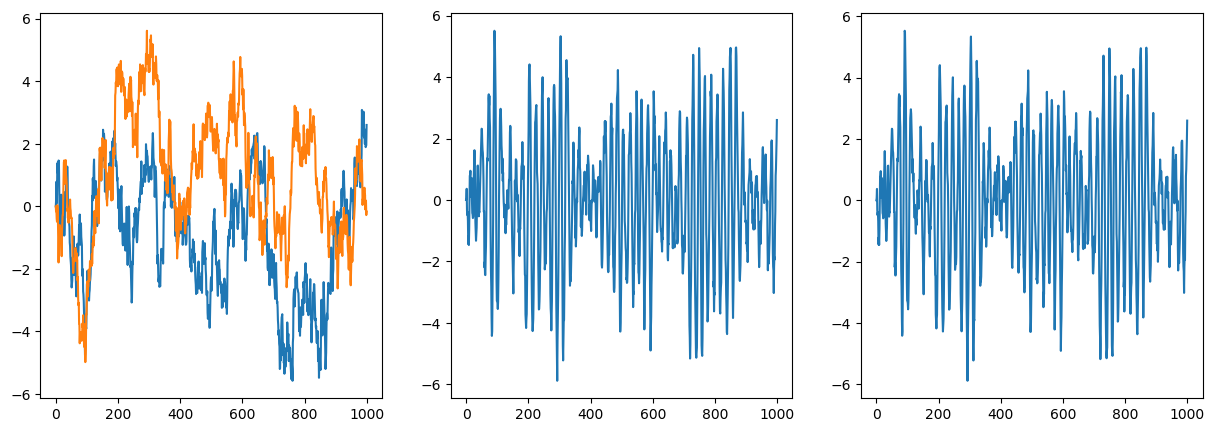

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000637B30B8>

In [5]:
# signal statistics 
N = 1000
fs = 100

# process parameters
œÅ = 0.99
f = 5
œÉ_p = 0.4
œÉ_n = 0.01

# create signal (option 1)
s = Array{Complex{Float64},1}(undef, N)
x = Array{Float64,1}(undef, N)
y = Array{Float64,1}(undef, N)
s[1] = 0 + 0*1im
x[1] = 0
y[1] = 0
for n = 2:N
    s[n] = œÅ*s[n-1] + rand(Normal(0, œÉ_p)) + rand(Normal(0, œÉ_p))*1im
    x[n] = real(s[n]*exp(-1im*f/fs*2*pi*n))
    y[n] = rand(Normal(x[n], œÉ_n))
end

_, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].plot(real(s))
ax[1].plot(imag(s))
ax[2].plot(x)
ax[3].plot(y)

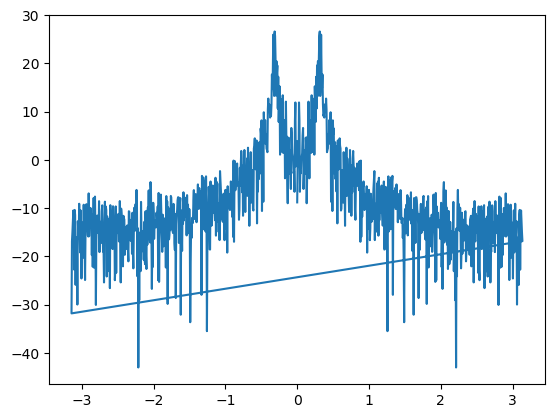

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063869438>

In [6]:
plt.plot(FFTW.fftfreq(length(x), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(x)).^2)./length(x)))

In [7]:
signal, fs_sig = wavread("../data/airco.wav", format="native")
fs_sig = Int(fs_sig)
signal = Float64.(signal)
    
# crop signal
signal = signal[1*fs_sig+1:(1+3)*fs_sig]
    
# preprocess signal and save
signal = preprocess(signal, fs_sig, fs_desired=8000, normalization_method="max")
t = collect(1:length(signal))/8000
audioplayers(signal, fs=8000)

<source src="data:audio/wav;base64,UklGRjx3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQB3AQCPiwk+PFyWPtb3oz6gabY+rza3PkTc0T4i2u4+DFoFP51wDT/viv4+NsPaPk3byD6I/L0+dfrSPsqLzj5nj8E+gBmSPmcrkT7TxpM+pr2xPgBDjj6q3IE+my9xPj5f/j1yQDs+rf0LPp6HN712nFe+m9d3vqNREb79/vc8sMS9PfVv37zQFO29f3dAvqgy2726alO9epwdvlZsK77GdZC+WnHRvmRf7L4KGdu+qESOvn1omL4XInS+i3qkvr8Ct74YCMO+x9b2vhP8BL8fjAC/6XoJv2bi7b62i7i+L1Jivk7ecL6wzJq+ZtmIvtxacL6cl0i+hSihva+MP73PGmq8u1wDvg+Ql76MIJ++ejtDvgrf9LwjK389TcmGO+fVqb0Hk4S9f+bOPf8EeT73lFo+SEQ2PocSPz22KWY92tuUPtMY9j4rpQU/uu3QPjuPlz7S8Lw+QCIEPzD+Jz9MJCQ/BBEKP07QGT+sPiQ/SNw2P6M6JT/1UAQ/O+D0Pibo5j4vpes+lHfkPvg5tj48kYM+ErOTPicXvz5J5qE+lD4BPrBlAL3oSBO9KMMoPTrj6j2E+747uuAlvlpfub4jydW+GkmnviItQ74Zfm++TsWrvlmJzb79quO+r4zrvjjg2r4PeN6+PwfQvovFvL4FyrO+N/6svr9Xsb7gNHW+wiyAvtI/gL5LyFu+92R3vkqofb6cuFG+Z0aKviAFgr5PBH2+9/V1vjtMM75zYhS+neCbvmRNBr+9Hhe/m2sGv//UyL6Dh3++wp1Ovo6edL7sLcG+iiW8voWQuL74W6S+GKNSvs7ECb6QpSG+Rky2vf7mi711jH+9jXe2POozTj6GvKk+Yl7GPpa/wD6Ln5U+FfGfPnOWzj5U/wk/gwooPxL1Jj+tQgw/7eT9PjeYAj8L3yk/XshBP3MvJT+58AA/y5yxPpVupD79bbM+rZIGP3s4OD9MoD4/RsMqP/uyBj+0MP0+PLzbPgSE7z76Vss+MeqUPnzQYj4dIT8+uiQzPuHd6D0LolA8Uge+vR+mar4A/Gq+Ahh0viWVir7rcL6+VbIIv5f1I7/DZhu/VgkGv1O2875LxAq/QO4iv2ZPO7+EwC2/D8oXv8VJH7+xayW/+5oPv1jdBL8aN92+duLgvnyi2L4HQdW+JVewvqOmj74neJS+XtiEvq+2Vr5PGzy+DGgxvncKKb4SHia+kKO+vSJkUr4j13e9fBafPWy1qT3Zmyw7E2P0veyWEL0TPn69SoUEPVmdYj4OZVc+A3gnPYGXOrxPv4Q9p2aCPm9Lxj4CivA+8HvYPmiNqj4pBr0+RjbOPpKG2z6M19Q+rCbKPinasj5oBI8+5IaEPsqisj6hxrs+iIrZPvarzT6a4rQ+eCmJPt/9Lj4NvK49WNBRPn7hgz4Adbk+dqSaPofAPT6ooNA93b+8PVSUhD5M3bA+QcS+PhLrlz6AGyg9MdsjPQs2pz0slcE9MsVCPQ/+6bwFukS9vO9rvdywjDuIPpg8aoNTvZq0Ib6miFW+JIpbvrPWHL5yeXO+qi/0vpwTBL8w8he/brUHv7Jy9b5khw6/UvMzv5cHTL95xDi/9C8rv2fPD7+85vu+fXAUvzAODb+9XfS+7DOCvuHnRr7ulEa+CMokvq/Z2b0J0D88NvauPRY9yT3dDOQ9OjQ4PnPEmD6KT50+ILNsPmj6Fz6YiYI9bbS4PS0lqj5hzLs+/6W7PrX1gj6k/4c91YhSPSWquD1Ekpk+1fybPosnez4n0Fs+alOTPh/umz7X3Mc+dKDQPpUhzz7HIZc+DNQvPkh4nT6kEsI+97ncPpEpyj5Do6M+IJt3Pli8fj5KlpI+FX+BPkWBaD6sJxE+N3cDPpzPHD51NPo9VGQOPohSDT6yZsM9RhWuPcL+Mz0RO4E9F+nyO8Crx73cLQm+AGm2vaZgkr0VXfi8tgJpvGA6Eb41QlO+GZF5vv6SRb5iktW9Y1ZXvhsdtr41R9++C+HqvuR7Cb/ESAC/e3MDv2XGAb+2Gga/rUsXv6eyLr9jGFu/p5JsvxkSWb9a+0m/Ikcqv8G1Hb+HpxW/kPISv2oq976W6sq+c9WUvq4YJb5gR/K9DwCfvfq3BT6PP4A+NnbTPvZXAD8nkdc+/ZuvPnbWuT47/s4+YZr/Ps0wIz8omSE/UA8PP4Cf6j6HT+w+ei8YP6KfHT+5zw8/zRD3PiZG2z5tMf8+bsQOP6J3Bj/lSPA+OLC4PiZCuD67I60+cabFPrYjvT7tAqI+j3GNPjswqD6A1LE+ELanPhYfVD4Bhkw+VqplPtoajj4s/qU+oWWAPp1HEj40OO685g7EvUc/lL0bCTa+wx9nvmTbkb5tfaK+HWpbvmJkXr4s95a+ASrvvno/Fb8OGAm/hNX+vhC/Cb/bNh6/ggIvv+IXGr+8B/a+d1KavvYxkL6NoNW+tsUTv4dmGb+mpfy+L+i1vl32pr4Wd5C+yLejvgjRmb6q+Ty+SJ86vrUNQb4/OxC+MsTRvU0wfr2AgVi9CebFvSaVX74aEja+TJ2+vNquGT6lFUc+g/PvPcBEwj1onOA8N74ePk3sCz5Oims9kkRCPXMTlT1IXEo+uDGUPuLSoD4Jh5Y+W7+rPlCfzD5KIQI/STEdP4VtID9q+fo+DtvqPjO+5j6+ftU+kXwNPy/w5z5vN+g+4YYGP758ED9b2wQ/xG4NP6ZcGj8aAQQ/YxTtPnNrxT7V4pQ+mz2aPtwNtz4xNKc+iis5PqocsD0nDye9uMMDvoj+Fb6X64a+9CFyvh9smb5f16O+UprbvvHqGb/7dia/L30Qv/g/Ab84+gq/fhksvw6FXL9eR2q/Nf9gv4VcOr+EcQu/bIMFv2fc+b4oN+++XXL0vp6H2L46Fcu+IbPjvvy6qr53yYG+kwDkvQ08hr37jPO965dYvm8Ea74Rgu29xeKtPfX3GT0EUFK9H2jMvfMeLb120aE92HpiPpXBZj6YwDc+TUUqPpScdD4RIpA+zobcPkCw8j4CddE+aJHFPsaE0T4Dsc8+dwqUPgFURT5yz8w9pPx1PlyCxz4BNwE/snPVPvMajD6f1RM+cVVcPu+lxT4xAuk+HBjtPlK08z4QWOo+dWoYP/1HFT+XlRc/E4TtPjXAtD7Gapo+X7TCPhzz/D6vlQ4//qvsPo82mz4tHis+x18LPiCKJj6HcCs+pGm2PYqgL70UR7i9OWkLvh6/dLva9eo8iJWvO3IeF759/4O+FVzLvitJCr939Bq/z8Mcvxt4Gb9HxSG/0oARv8+zDL9Tmhi/LYIPv1ykDr9UxR+/i/knvxTZJ7+uxTK/KQZSv/JGSL9B+y+/IOosv4Y6E78ZxPi+l9XpvrMSwr5lTdG+o0LevjBppL7Qh6C+U8qFvgiRV74aika+/z6ivWSVIz27Uwk+UB98PqAPgD5q/5k+ORmPPvrliD7RdKs+zjLAPqQSqT53asA+AEWmPip+oj5q1tA+a0jJPphyzz7L9rc+AViPPmvKLD7Ch/09PQlZPRmpXD4wtJg+rMPKPjMFnD4YO20+JGuUPsrywT5F0Lg+42eGPiEd5j1Wd/M8IfCIPhQw8D4MLxc/f2YDP6G0mj6ZA+Q9xfuCPVOsGj7+WqQ+t7OcPs1GMT4p6aK94JI1vp6Nur09MKY9mRabPReYfr2dlx6+j2hzvs0wor6YKLC+BI3Hvpfj+75H+Aq/VdjxvoOO7b5zKsm+lsfPvmg05r5rO+O++ST8vvzT/74NqPG+j2zxvtPCu757loO+R21QvgwdJr5Mx1O+6kUsvmcvTD2CaZU+HgjUPsu7lD6FKQE+XlCaPC3oEz3Er0U+oxOnPrCSsz5e26Q+c/YjPss+Bz6g2ow+LPHFPhtX2T6aS

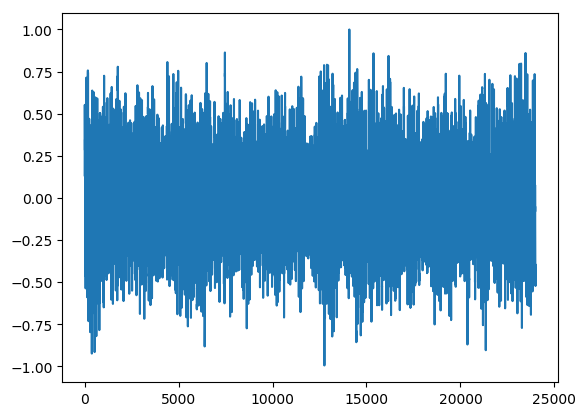

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063904B00>

In [8]:
plt.plot(signal)

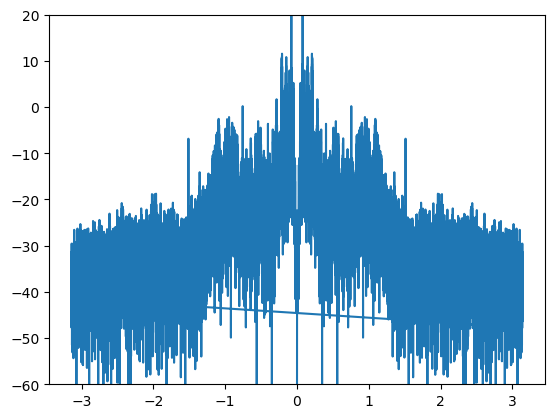

(-60, 20)

In [9]:
plt.plot(FFTW.fftfreq(length(signal), 8000)/8000*2*pi, 10*log10.((abs.(FFTW.fft(signal)).^2)./length(signal)))
plt.ylim(-60, 20)

In [10]:
# initialize memory struct for filter taps and spectrum coefficients
mem_spec = Array{Complex{Float64},2}(undef, Int(length(signal)/32)+10, 32)

buf = BufferData(signal, t, 32)

# loopt through time-domain signal
for k = 1:len(buf, 32)
        # calculate windowed FFT of taps
    mem_spec[k,:] = FFTW.fft(buf.buffer_s)
    
    FLAG_data_remaining = step!(buf, 32)

end

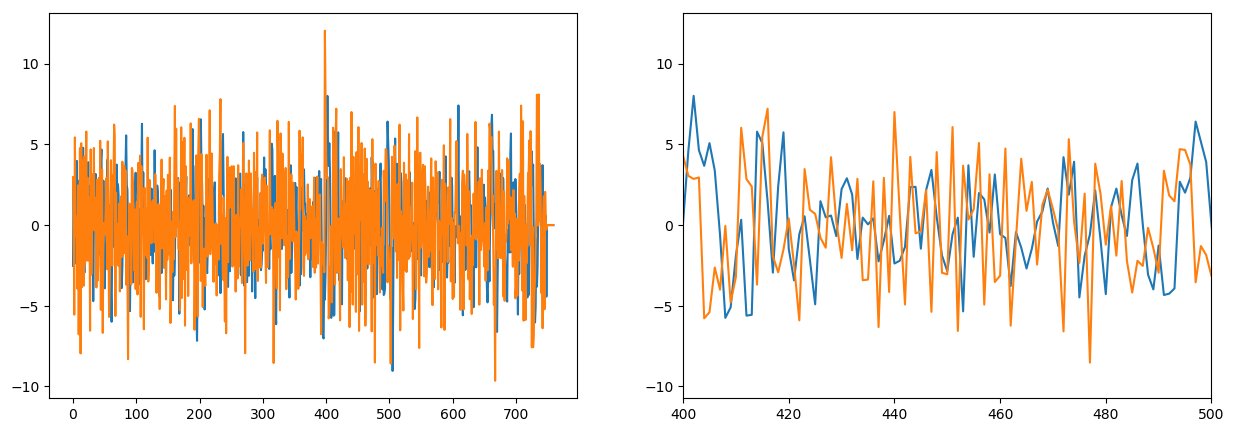

(400, 500)

In [11]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(real(mem_spec[:,2]))
ax[1].plot(imag(mem_spec[:,2]))
ax[2].plot(real(mem_spec[:,2]))
ax[2].plot(imag(mem_spec[:,2]))
ax[2].set_xlim(400,500)

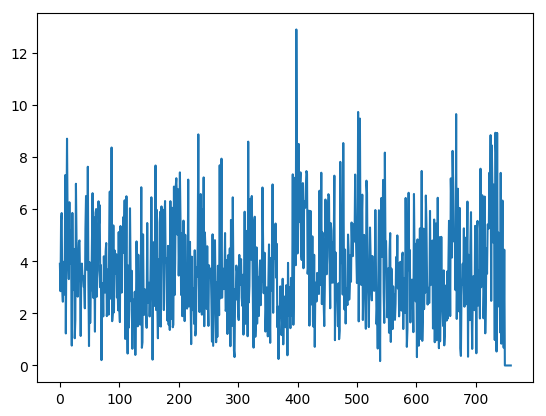

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000064325438>

In [12]:
plt.plot(abs.(mem_spec[:,2]))

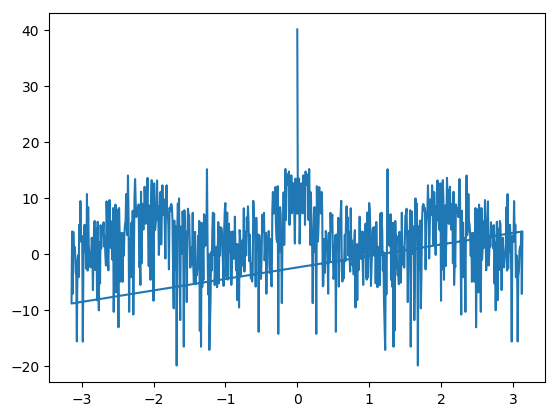

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062689E10>

In [13]:
plt.plot(FFTW.fftfreq(length(abs.(mem_spec[:,2])), 8000)/8000*2*pi, 10*log10.((abs.(FFTW.fft(abs.(mem_spec[:,2]))).^2)./length(abs.(mem_spec[:,2]))))


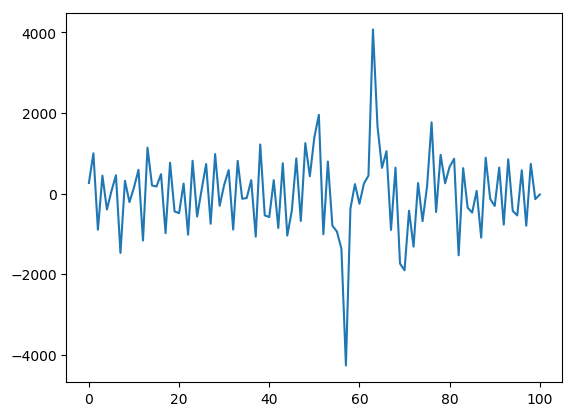

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062669198>

In [14]:
plt.plot(xcorr(real(mem_spec[:,2]), imag(mem_spec[:,2]))[700:800])

In [15]:
# signal statistics 
N = 1000
fs = 100

# process parameters
œÅ = 0.95
f = 5
œÉ_p = 0.4
œÉ_n = 0.01

# create signal (option 1)
si = Array{Complex{Float64},1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 + 0*1im
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = œÅ*si[n-1] + rand(Normal(0, œÉ_p)) + rand(Normal(0, œÉ_p))*1im
    xi[n] = real(si[n]*exp(-1im*f/fs*2*pi*n))
    yi[n] = rand(Normal(xi[n], œÉ_n))
end

t = collect(1:N)/fs
;

In [16]:
fg = FactorGraph()

@RV smin ~ GaussianMeanVariance(placeholder(:Œº_smin, dims=(4,)), placeholder(:Œ£_smin, dims=(4,4)))
#@RV Œ≥ ~ Gamma(placeholder(:a_Œ≥), placeholder(:b_Œ≥))
#@RV Œ∏ ~ GaussianMeanVariance(placeholder())
@RV s ~ GaussianMeanVariance(smin, placeholder(:Œ£_s, dims=(4,4)))
@RV x ~ DotProduct(s, placeholder(:c, dims=(4,)))
@RV y ~ GaussianMeanVariance(x, placeholder(:Œ£_x))
placeholder(y, :y)

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11984335401813360745 -->
 11984335401813360745 
 
 placeholder_Œº_smin 
 
<!-- 9297809208472160820 -->
 9297809208472160820 
 
 placeholder_Œ£_smin 
 
<!-- 15504059411961667255 -->
 15504059411961667255 
 
 dot 
 dotproduct_1 
 
<!-- 1722544189040223289 -->
 1722544189040223289 
 
 placeholder_c 
 
<!-- 15504059411961667255--1722544189040223289 -->
 15504059411961667255--1722544189040223289 
 
 c 
 1 out 
 3 in2 
 
<!-- 1231872008338720447 -->
 1231872008338720447 
 
 ùí© 
 gaussianmeanvariance_2 
 
<!-- 15504059411961667255--1231872008338720447 -->
 15504059411961667255--1231872008338720447 
 
 s 
 1 out 
 2 in1 
 
<!-- 4506165133990896817 -->
 4506165133990896817 
 
 placeholder_y 
 
<!-- 2569754436619271578 -->
 2569754436619271578 
 
 ùí© 
 gaussianmeanvariance_3 
 
<!-- 4506165133990896817--2569754436619271578 -->
 4506165133990896817--2569754436619271578 
 
 y 
 1 out 
 1 out 
 
<!-- 13958544681146237055 -->
 13958544681146237055 
 
 placeholder_Œ£_x 
 
<!-- 17906000797333484844 -->
 17906000797333484844 
 
 ùí© 
 gaussianmeanvariance_1 
 
<!-- 17906000797333484844--11984335401813360745 -->
 17906000797333484844--11984335401813360745 
 
 Œº_smin 
 1 out 
 2 m 
 
<!-- 17906000797333484844--9297809208472160820 -->
 17906000797333484844--9297809208472160820 
 
 Œ£_smin 
 1 out 
 3 v 
 
<!-- 2569754436619271578--15504059411961667255 -->
 2569754436619271578--15504059411961667255 
 
 x 
 1 out 
 2 m 
 
<!-- 2569754436619271578--13958544681146237055 -->
 2569754436619271578--13958544681146237055 
 
 Œ£_x 
 1 out 
 3 v 
 
<!-- 12893080031726064967 -->
 12893080031726064967 
 
 placeholder_Œ£_s 
 
<!-- 1231872008338720447--17906000797333484844 -->
 1231872008338720447--17906000797333484844 
 
 smin 
 1 out 
 2 m 
 
<!-- 1231872008338720447--12893080031726064967 -->
 1231872008338720447--12893080031726064967 
 
 Œ£_s 
 1 out 
 3 v

In [17]:
algo = sumProductAlgorithm(s)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function step!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleSPGaussianMeanVarianceOutNPP(nothing, Message(ForneyLab.Multivariate, PointMass, m=data[:Œº_smin]), Message(MatrixVariate, PointMass, m=data[:Œ£_smin]))
messages[2] = ruleSPGaussianMeanVarianceOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:Œ£_s]))
messages[3] = ruleSPGaussianMeanVarianceMPNP(Message(ForneyLab.Univariate, PointMass, m=data[:y]), nothing, Message(ForneyLab.Univariate, PointMass, m=data[:Œ£_x]))
messages[4] = ruleSPDotProductIn1GNP(messages[3], nothing, Message(ForneyLab.Multivariate, PointMass, m=data[:c]))

marginals[:s] = messages[2].dist * messages[4].dist

return marginals

end

end # block


In [18]:
Œº_smin = zeros(4)
Œ£_smin = 1e10*Ic(4)
Œ£_s = 0.4*0.4*Ic(4)
Œ£_x = 0.01*0.01

f = [5, 10]

s_extracted = Array{Float64,2}(undef, N, 2*length(f))

for n = 1:N
    marginals = Dict()
    data = Dict(:Œº_smin => Œº_smin,
                :Œ£_smin => Œ£_smin,
                :Œ£_s => Œ£_s,
                :Œ£_x => Œ£_x,
                :c => vcat([cos(2*pi*f[k]*t[n]) for k=1:length(f)], [sin(2*pi*f[k]*t[n]) for k=1:length(f)]),
                :y => yi[n])
    
    # perform message passing
    step!(data, marginals)
    
    # perform updates
    Œº_smin, Œ£_smin = ForneyLab.unsafeMeanCov(marginals[:s])
    s_extracted[n,:] = Œº_smin
    
end

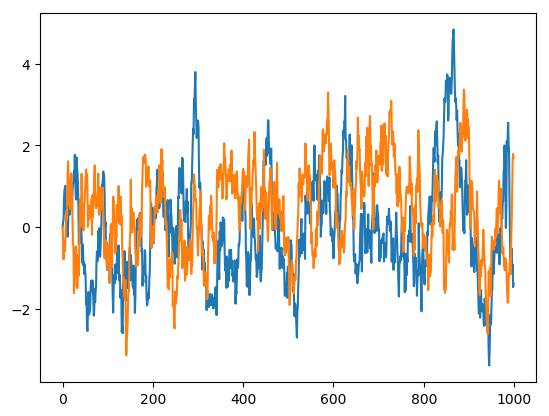

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062699D68>

In [19]:
plt.plot(real(si))
plt.plot(imag(si))

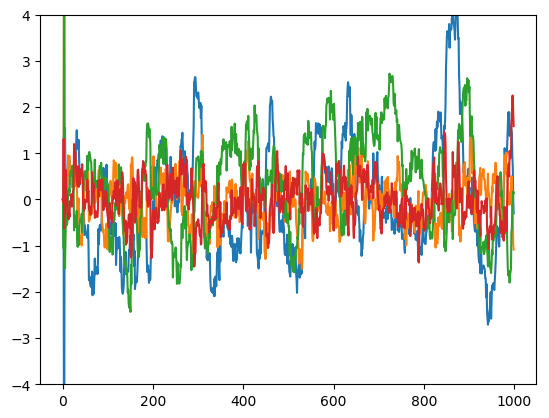

(-4, 4)

In [20]:
plt.plot(s_extracted)
plt.ylim(-4,4)

In [21]:
fg = FactorGraph()

smin = Array{Variable,1}(undef,4)
Œ≥ = Array{Variable,1}(undef,4)
s = Array{Variable,1}(undef,4)
Œ∏ = Array{Variable,1}(undef,4)
x = Array{Variable,1}(undef,4)

for k = 1:4
    #@RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_smin,k), dims=(1,)), placeholder(pad(:Œ£_smin,k), dims=(1,1)))
    #@RV Œ≥[k] ~ ForneyLab.Gamma(placeholder(pad(:a_Œ≥,k)), placeholder(pad(:b_Œ≥,k)))
    #@RV Œ∏[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_Œ∏,k), dims=(1,)), placeholder(pad(:Œ£_Œ∏,k), dims=(1,1)))
    #@RV s[k] ~ LAR.Autoregressive(Œ∏[k], smin[k], Œ≥[k])
    #@RV x[k] ~ DotProduct(s[k], placeholder(pad(:c,k), dims=(1,)))
    @RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_smin,k)), placeholder(pad(:Œ£_smin,k)))
    @RV Œ≥[k] ~ ForneyLab.Gamma(placeholder(pad(:a_Œ≥,k)), placeholder(pad(:b_Œ≥,k)))
    @RV Œ∏[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_Œ∏,k)), placeholder(pad(:Œ£_Œ∏,k)))
    @RV s[k] ~ LAR.Autoregressive(Œ∏[k], smin[k], Œ≥[k])
    @RV x[k] = s[k]*placeholder(pad(:c,k))
end

@RV xtot = sum(x)
@RV y ~ GaussianMeanVariance(xtot, placeholder(:Œ£_x))
placeholder(y, :y)

q = PosteriorFactorization([smin[1], s[1], smin[2], s[2], smin[3], s[3], smin[4], s[4]], Œ≥[1], Œ∏[1], Œ≥[2], Œ∏[2], Œ≥[3], Œ∏[3], Œ≥[4], Œ∏[4], ids=[:S, :Œ≥1, :Œ∏1, :Œ≥2, :Œ∏2, :Œ≥3, :Œ∏3, :Œ≥4, :Œ∏4])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 14738409160131110160 -->
 14738409160131110160 
 
 Gam 
 gamma_2 
 
<!-- 7428951626516827577 -->
 7428951626516827577 
 
 placeholder_b_Œ≥_02 
 
<!-- 14738409160131110160--7428951626516827577 -->
 14738409160131110160--7428951626516827577 
 
 b_Œ≥_02 
 1 out 
 3 b 
 
<!-- 2116775088386126149 -->
 2116775088386126149 
 
 placeholder_a_Œ≥_02 
 
<!-- 14738409160131110160--2116775088386126149 -->
 14738409160131110160--2116775088386126149 
 
 a_Œ≥_02 
 1 out 
 2 a 
 
<!-- 3222556926547142399 -->
 3222556926547142399 
 
 placeholder_Œº_Œ∏_03 
 
<!-- 17894499964203252226 -->
 17894499964203252226 
 
 ùí© 
 gaussianmeanvariance_3 
 
<!-- 930857683806672456 -->
 930857683806672456 
 
 placeholder_Œ£_smin_02 
 
<!-- 17894499964203252226--930857683806672456 -->
 17894499964203252226--930857683806672456 
 
 Œ£_smin_02 
 1 out 
 3 v 
 
<!-- 15646896650263273650 -->
 15646896650263273650 
 
 placeholder_Œº_smin_02 
 
<!-- 17894499964203252226--15646896650263273650 -->
 17894499964203252226--15646896650263273650 
 
 Œº_smin_02 
 1 out 
 2 m 
 
<!-- 12560424521691247194 -->
 12560424521691247194 
 
 ùí© 
 gaussianmeanvariance_5 
 
<!-- 8652381672761284811 -->
 8652381672761284811 
 
 placeholder_Œº_smin_03 
 
<!-- 12560424521691247194--8652381672761284811 -->
 12560424521691247194--8652381672761284811 
 
 Œº_smin_03 
 1 out 
 2 m 
 
<!-- 11318197806533388803 -->
 11318197806533388803 
 
 placeholder_Œ£_smin_03 
 
<!-- 12560424521691247194--11318197806533388803 -->
 12560424521691247194--11318197806533388803 
 
 Œ£_smin_03 
 1 out 
 3 v 
 
<!-- 16879157845057069312 -->
 16879157845057069312 
 
 placeholder_c_02 
 
<!-- 2123166255360086688 -->
 2123166255360086688 
 
 ùí© 
 gaussianmeanvariance_4 
 
<!-- 13460571262640088744 -->
 13460571262640088744 
 
 placeholder_Œ£_Œ∏_02 
 
<!-- 2123166255360086688--13460571262640088744 -->
 2123166255360086688--13460571262640088744 
 
 Œ£_Œ∏_02 
 1 out 
 3 v 
 
<!-- 7025555982069690554 -->
 7025555982069690554 
 
 placeholder_Œº_Œ∏_02 
 
<!-- 2123166255360086688--7025555982069690554 -->
 2123166255360086688--7025555982069690554 
 
 Œº_Œ∏_02 
 1 out 
 2 m 
 
<!-- 12232393351322177861 -->
 12232393351322177861 
 
 ùí© 
 gaussianmeanvariance_7 
 
<!-- 3353573658432269203 -->
 3353573658432269203 
 
 placeholder_Œ£_smin_04 
 
<!-- 12232393351322177861--3353573658432269203 -->
 12232393351322177861--3353573658432269203 
 
 Œ£_smin_04 
 1 out 
 3 v 
 
<!-- 17894070179626414404 -->
 17894070179626414404 
 
 placeholder_Œº_smin_04 
 
<!-- 12232393351322177861--17894070179626414404 -->
 12232393351322177861--17894070179626414404 
 
 Œº_smin_04 
 1 out 
 2 m 
 
<!-- 17921181342504322539 -->
 17921181342504322539 
 
 placeholder_c_01 
 
<!-- 6584431869555571156 -->
 6584431869555571156 
 
 placeholder_Œ£_Œ∏_04 
 
<!-- 10515296662525702008 -->
 10515296662525702008 
 
 + 
 addition_3 
 
<!-- 3369578184137342039 -->
 3369578184137342039 
 
 √ó 
 multiplication_4 
 
<!-- 10515296662525702008--3369578184137342039 -->
 10515296662525702008--3369578184137342039 
 
 x_4 
 1 out 
 3 in2 
 
<!-- 10217808235120837520 -->
 10217808235120837520 
 
 + 
 addition_2 
 
<!-- 10515296662525702008--10217808235120837520 -->
 10515296662525702008--10217808235120837520 
 
 variable_6 
 1 out 
 2 in1 
 
<!-- 2638067130001165948 -->
 2638067130001165948 
 
 √ó 
 multiplication_1 
 
<!-- 2638067130001165948--17921181342504322539 -->
 2638067130001165948--17921181342504322539 
 
 c_01 
 1 out 
 2 in1 
 
<!-- 4851632757158277683 -->
 4851632757158277683 
 
 A

In [22]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepŒ≥2!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_Œ≥_02]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_Œ≥_02]))
messages[2] = ruleSVariationalARIn3PPPN(marginals[:s_2_smin_2], marginals[:Œ∏_2], nothing)

marginals[:Œ≥_2] = messages[1].dist * messages[2].dist

return marginals

end

function stepŒ≥4!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_Œ≥_04]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_Œ≥_04]))
messages[2] = ruleSVariationalARIn3PPPN(marginals[:s_4_smin_4], marginals[:Œ∏_4], nothing)

marginals[:Œ≥_4] = messages[1].dist * messages[2].dist

return marginals

end

function stepŒ∏1!(data::Dict, marginals::Dict=Dict(), mes

In [23]:
# Œº_smin = [[0.0], [0.0], [0.0], [0.0]]
# Œ£_smin = [1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1)]
# a_Œ≥ = [1.0, 1.0, 1.0, 1.0]
# b_Œ≥ = [0.001, 0.001, 0.001, 0.001]
# Œº_Œ∏ = [[0.0], [0.0], [0.0], [0.0]]
# Œ£_Œ∏ = [1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1)]
# Œ£_x = 1e-6
Œº_smin = [0.0, 0.0, 0.0, 0.0]
Œ£_smin = [1e1, 1e1, 1e1, 1e1]
a_Œ≥ = [0.1, 0.1, 0.1, 0.1]
b_Œ≥ = [0.001, 0.001, 0.001, 0.001]
Œº_Œ∏ = [0.0, 0.0, 0.0, 0.0]
Œ£_Œ∏ = [1e0, 1e0, 1e0, 1e0]
Œ£_x = 1e-8
;

In [24]:
f = [5, 10]

s_extracted = Array{Float64,2}(undef, N, 2*length(f))
Œ∏_extracted = Array{Float64,2}(undef, N, 2*length(f))

for n = 1:N
    # create marginals dictionary
    marginals = Dict()
    for k = 1:4
        marginals[pad(:Œ≥,k,len=1)] = ProbabilityDistribution(ForneyLab.Gamma, a=a_Œ≥[k], b=b_Œ≥[k])
        #marginals[pad(:Œ∏,k,len=1)] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_Œ∏[k], v=Œ£_Œ∏[k])
        marginals[pad(:Œ∏,k,len=1)] = ProbabilityDistribution(GaussianMeanVariance, m=Œº_Œ∏[k], v=Œ£_Œ∏[k])
    end
    
    # create data dictionary
    data = Dict()
    for k = 1:4
        data[pad(:Œº_smin, k)] = Œº_smin[k]
        data[pad(:Œ£_smin, k)] = Œ£_smin[k]
        data[pad(:a_Œ≥, k)] = a_Œ≥[k]
        data[pad(:b_Œ≥, k)] = b_Œ≥[k]
        data[pad(:Œº_Œ∏, k)] = Œº_Œ∏[k]
        data[pad(:Œ£_Œ∏, k)] = Œ£_Œ∏[k]
        if k <= 2
            data[pad(:c, k)] = cos(2*pi*f[k]*t[n])
        else
            data[pad(:c, k)] = sin(2*pi*f[k-2]*t[n])
        end
    end
    data[:Œ£_x] = Œ£_x
    data[:y] = yi[n]

    # perform message passing
    for _ in 1:10
        Base.invokelatest(stepS!, data, marginals)
        Base.invokelatest(stepŒ∏4!, data, marginals)
        Base.invokelatest(stepŒ∏1!, data, marginals)
        Base.invokelatest(stepŒ∏3!, data, marginals)
        Base.invokelatest(stepŒ∏2!, data, marginals)
        Base.invokelatest(stepŒ≥4!, data, marginals)
        Base.invokelatest(stepŒ≥3!, data, marginals)
        Base.invokelatest(stepŒ≥1!, data, marginals)
        Base.invokelatest(stepŒ≥2!, data, marginals)
    end
    
    # perform updates
    for k = 1:4
        Œº_smin[k] = ForneyLab.unsafeMean(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1]
        Œ£_smin[k] = ForneyLab.unsafeCov(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1,1]
        Œº_Œ∏[k] = ForneyLab.unsafeMean(marginals[pad(:Œ∏,k,len=1)])
        Œ£_Œ∏[k] = ForneyLab.unsafeCov(marginals[pad(:Œ∏,k,len=1)])
        a_Œ≥[k] = marginals[pad(:Œ≥,k,len=1)].params[:a]
        b_Œ≥[k] = marginals[pad(:Œ≥,k,len=1)].params[:b]
    end
    
    # save some values
    for k = 1:4
        s_extracted[n,k] = Œº_smin[k][1]
        Œ∏_extracted[n,k] = Œº_Œ∏[k][1]
    end
    
end

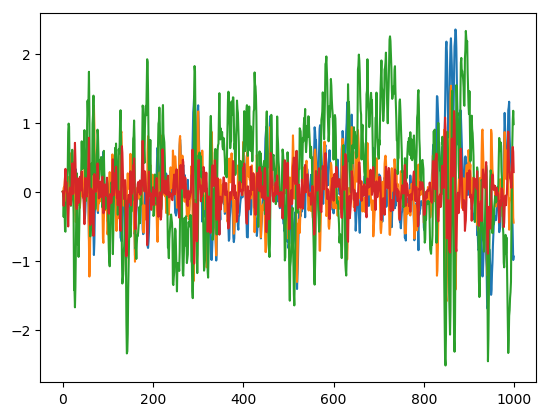

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000010FADD8>
 PyObject <matplotlib.lines.Line2D object at 0x00000000010FAF28>
 PyObject <matplotlib.lines.Line2D object at 0x00000000011050B8>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001105208>

In [25]:
plt.plot(s_extracted)

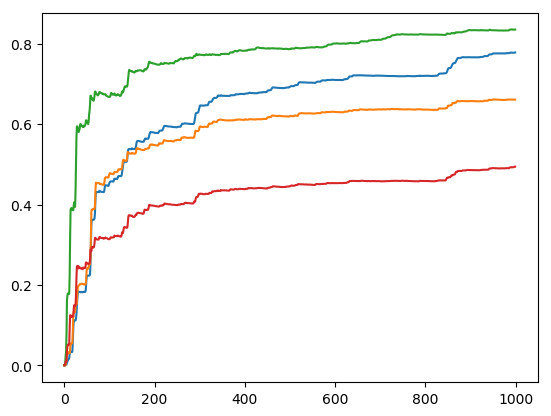

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001163208>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001163358>
 PyObject <matplotlib.lines.Line2D object at 0x00000000011634A8>
 PyObject <matplotlib.lines.Line2D object at 0x00000000011635F8>

In [26]:
plt.plot(Œ∏_extracted)

In [27]:
Œ∏_extracted

1000√ó4 Array{Float64,2}:
 0.0          0.0          0.0         0.0       
 0.0          0.0          0.0         0.0       
 0.00099732  -0.000298327  0.00481495  0.00379563
 0.00191951   0.00157585   0.0223984   0.00928161
 0.00191951   0.00531687   0.034848    0.00928161
 0.00192015   0.0195455    0.0804804   0.00930129
 0.00656646   0.028683     0.162599    0.0364912 
 0.00938637   0.0277539    0.173829    0.0464922 
 0.0124256    0.0286808    0.178743    0.0511234 
 0.0151252    0.0314475    0.178743    0.0511234 
 0.0156686    0.0320616    0.177268    0.0503665 
 0.0178668    0.0330819    0.17862     0.0531898 
 0.028746     0.0301949    0.228416    0.0940564 
 ‚ãÆ                                               
 0.777649     0.661123     0.835388    0.492714  
 0.778138     0.661295     0.835388    0.492714  
 0.777805     0.661056     0.835511    0.492797  
 0.777737     0.661041     0.8355      0.492742  
 0.777691     0.661036     0.835528    0.492721  
 0.777678     0.660963

# Same parameters on cos and sin functions

In [28]:
# signal statistics 
N = 5000
fs = 30

# process parameters
œÅ = 0.95
f = 5
œÉ_p = 0.2
œÉ_n = 0.01

# create signal (option 1)
si = Array{Complex{Float64},1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 + 0*1im
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = œÅ*si[n-1] + rand(Normal(0, œÉ_p)) + rand(Normal(0, œÉ_p))*1im
    xi[n] = real(si[n]*exp(-1im*f/fs*2*pi*n))
    yi[n] = rand(Normal(xi[n], œÉ_n))
end

t = collect(1:N)/fs
;

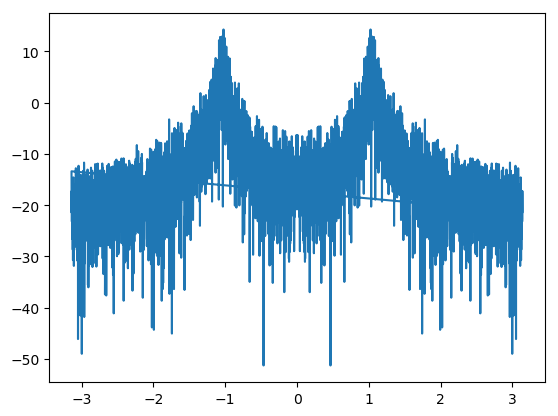

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000011B92E8>

In [29]:
plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

In [30]:
fg = FactorGraph()

wsize=2

smin = Array{Variable,1}(undef,4)
Œ≥ = Array{Variable,1}(undef,2)
s = Array{Variable,1}(undef,4)
Œ∏ = Array{Variable,1}(undef,2)
x = Array{Variable,1}(undef,4)

for k = 1:2
    @RV Œ≥[k] ~ ForneyLab.Gamma(placeholder(pad(:a_Œ≥,k)), placeholder(pad(:b_Œ≥,k)))
    @RV Œ∏[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_Œ∏,k)), placeholder(pad(:Œ£_Œ∏,k)))    
end

for k = 1:4
    #@RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_smin,k), dims=(1,)), placeholder(pad(:Œ£_smin,k), dims=(1,1)))
    #@RV Œ≥[k] ~ ForneyLab.Gamma(placeholder(pad(:a_Œ≥,k)), placeholder(pad(:b_Œ≥,k)))
    #@RV Œ∏[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_Œ∏,k), dims=(1,)), placeholder(pad(:Œ£_Œ∏,k), dims=(1,1)))
    #@RV s[k] ~ LAR.Autoregressive(Œ∏[k], smin[k], Œ≥[k])
    #@RV x[k] ~ DotProduct(s[k], placeholder(pad(:c,k), dims=(1,)))
    @RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:Œº_smin,k)), placeholder(pad(:Œ£_smin,k)))
    if k == 1 | k == 3
        @RV s[k] ~ LAR.Autoregressive(Œ∏[1], smin[k], Œ≥[1])
    else
        @RV s[k] ~ LAR.Autoregressive(Œ∏[2], smin[k], Œ≥[2])
    end
    @RV x[k] =  s[k] * placeholder(pad(:c,k))
end

@RV xtot = sum(x)
@RV y ~ GaussianMeanVariance(xtot, placeholder(:Œ£_x))
placeholder(y, :y)

q = PosteriorFactorization([smin[1], s[1], smin[2], s[2], smin[3], s[3], smin[4], s[4]], Œ≥[1], Œ∏[1], Œ≥[2], Œ∏[2], ids=[:S, :Œ≥1, :Œ∏1, :Œ≥2, :Œ∏2])

ForneyLab.draw(fg, external_viewer=true)

TypeError: TypeError: in keyword argument external_viewer, expected Symbol, got Bool

In [31]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepŒ≥2!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 6))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_Œ≥_02]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_Œ≥_02]))
messages[2] = ruleSVariationalARIn3PPPN(marginals[:s_1_smin_1], marginals[:Œ∏_2], nothing)
messages[3] = ruleSVariationalARIn3PPPN(marginals[:s_2_smin_2], marginals[:Œ∏_2], nothing)
messages[4] = ruleSVariationalARIn3PPPN(marginals[:s_4_smin_4], marginals[:Œ∏_2], nothing)
messages[5] = ruleSPEqualityGammaWishart(messages[3], nothing, messages[4])
messages[6] = ruleSPEqualityGammaWishart(nothing, messages[2], messages[5])

marginals[:Œ≥_2] = messages[1].dist * messages[6].dist

return marginals

end

function stepŒ∏1!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGaussianMeanVarianceOut(nothing, ProbabilityDistribution(ForneyL

In [32]:
# Œº_smin = [[0.0], [0.0], [0.0], [0.0]]
# Œ£_smin = [1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1)]
# a_Œ≥ = [1.0, 1.0, 1.0, 1.0]
# b_Œ≥ = [0.001, 0.001, 0.001, 0.001]
# Œº_Œ∏ = [[0.0], [0.0], [0.0], [0.0]]
# Œ£_Œ∏ = [1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1)]
# Œ£_x = 1e-6
Œº_smin = rand(4)#[0.0, 0.0, 0.0, 0.0]
Œ£_smin = [1e10, 1e10, 1e10, 1e10]
a_Œ≥ = [1.0, 1.0]
b_Œ≥ = [0.001, 0.001]
Œº_Œ∏ = [0.95, 0.90]
Œ£_Œ∏ = [1e-4, 1e-4]
Œ£_x = 0.01*0.01
;

In [33]:
f = [5, 10]

s_extracted = Array{Float64,2}(undef, N, 2*length(f))
Œ∏_extracted = Array{Float64,2}(undef, N, length(f))
inv_mean_Œ≥ = Array{Float64,2}(undef, N, length(f))
marginals = Dict()

for n = 1:N
    # create marginals dictionary
    for k = 1:2
        marginals[pad(:Œ≥,k,len=1)] = ProbabilityDistribution(ForneyLab.Gamma, a=a_Œ≥[k], b=b_Œ≥[k])
        #marginals[pad(:Œ∏,k,len=1)] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_Œ∏[k], v=Œ£_Œ∏[k])
        marginals[pad(:Œ∏,k,len=1)] = ProbabilityDistribution(GaussianMeanVariance, m=Œº_Œ∏[k], v=Œ£_Œ∏[k])
    end
    
    # create data dictionary
    data = Dict()
    for k = 1:4
        data[pad(:Œº_smin, k)] = Œº_smin[k]
        data[pad(:Œ£_smin, k)] = Œ£_smin[k]
        if k <= 2
            data[pad(:c, k)] = cos(2*pi*f[k]*t[n])
        else
            data[pad(:c, k)] = sin(2*pi*f[k-2]*t[n])
        end
    end
    for k = 1:2
        data[pad(:a_Œ≥, k)] = a_Œ≥[k]
        data[pad(:b_Œ≥, k)] = b_Œ≥[k]
        data[pad(:Œº_Œ∏, k)] = Œº_Œ∏[k]
        data[pad(:Œ£_Œ∏, k)] = Œ£_Œ∏[k]
    end
    data[:Œ£_x] = Œ£_x
    data[:y] = yi[n]

    # perform message passing
    for _ in 1:1
        Base.invokelatest(stepS!, data, marginals)
        Base.invokelatest(stepŒ≥1!, data, marginals)
        Base.invokelatest(stepŒ≥2!, data, marginals)
        Base.invokelatest(stepŒ∏1!, data, marginals)
        Base.invokelatest(stepŒ∏2!, data, marginals)
        #Base.invokelatest(stepŒ∏1!, data, marginals)
        #Base.invokelatest(stepŒ≥1!, data, marginals)
        #Base.invokelatest(stepŒ∏2!, data, marginals)
        #Base.invokelatest(stepŒ≥2!, data, marginals)
    end
    
    # perform updates
    for k = 1:4
        Œº_smin[k] = ForneyLab.unsafeMean(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1]
        Œ£_smin[k] = ForneyLab.unsafeCov(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1,1]
    end
    for k = 1:2
        Œº_Œ∏[k] = ForneyLab.unsafeMean(marginals[pad(:Œ∏,k,len=1)])
        Œ£_Œ∏[k] = ForneyLab.unsafeCov(marginals[pad(:Œ∏,k,len=1)])
        a_Œ≥[k] = marginals[pad(:Œ≥,k,len=1)].params[:a]
        b_Œ≥[k] = marginals[pad(:Œ≥,k,len=1)].params[:b]
    end
    
    # save some values
    for k = 1:4
        s_extracted[n,k] = Œº_smin[k][1]
    end
    for k = 1:2
        Œ∏_extracted[n,k] = Œº_Œ∏[k][1]
        inv_mean_Œ≥[n,k] = b_Œ≥[k]/a_Œ≥[k]
    end
end

In [34]:
marginals[:smin_1]

ùí©(xi=47.41, w=34.44)


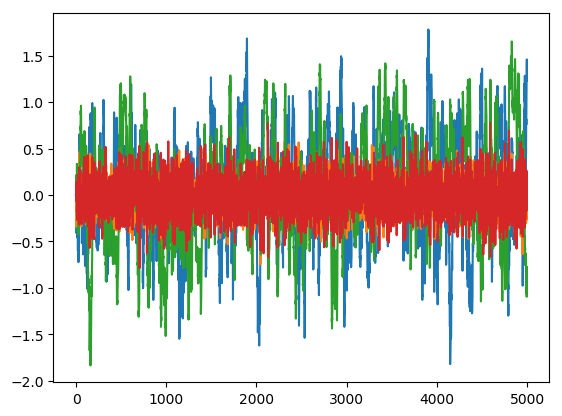

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E4860>
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E49B0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E4B00>
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E4C50>

In [35]:
plt.plot(s_extracted)

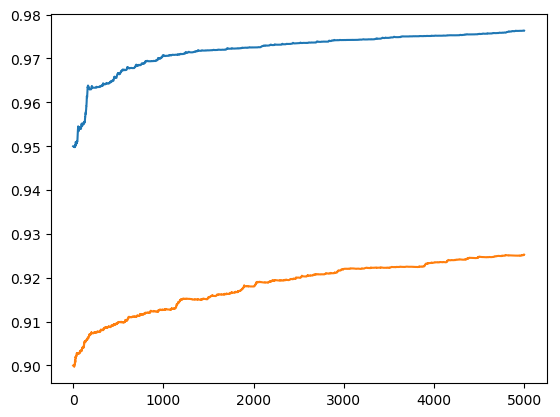

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000224DC50>
 PyObject <matplotlib.lines.Line2D object at 0x000000000224DDA0>

In [36]:
plt.plot(Œ∏_extracted)

In [37]:
# mean variance
1/a_Œ≥[1]*b_Œ≥[1], 1/a_Œ≥[2]*b_Œ≥[2]

(0.004206977668603082, 0.016730961548699592)

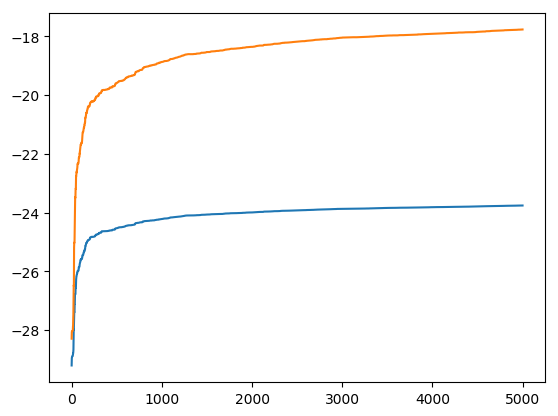

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000022ACB38>
 PyObject <matplotlib.lines.Line2D object at 0x00000000022ACC88>

In [38]:
plt.plot(10*log10.(inv_mean_Œ≥))

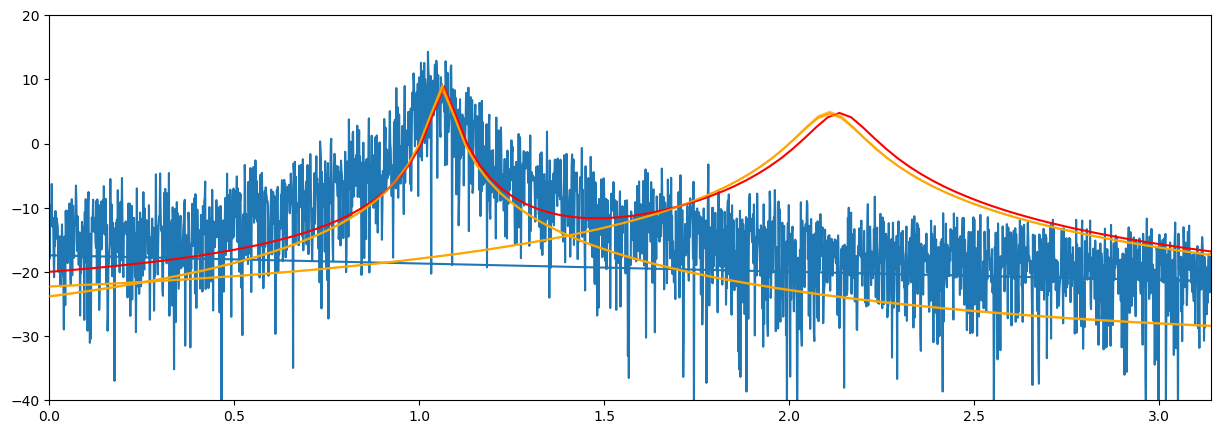

(0, 3.141592653589793)

In [39]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
for k = 1:2
    Œ∏_sampled, Œ≥_sampled = AR_distributions([Œº_Œ∏[k]], mat(1/Œ£_Œ∏[k]), a_Œ≥[k], b_Œ≥[k])
    mean_psd, std_psd = summary_psd(Œ∏_sampled, Œ≥_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    Œ∏x = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(Œ∏x, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(Œ∏x, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[100-Int(round(f[k]/fs*200)):200-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 20)

plt.xlim(0,pi)

# Turing test (only 1 AR coef)

In [40]:
# signal statistics 
N = 50
fs = 10

# process parameters
œÅ = 0.95
f = 2
œÉ_p = 0.2
œÉ_n = 0.01

# create signal (option 1)
si = Array{Complex{Float64},1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 + 0*1im
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = œÅ*si[n-1] + rand(Normal(0, œÉ_p)) + rand(Normal(0, œÉ_p))*1im
    xi[n] = real(si[n]*exp(-1im*f/fs*2*pi*n))
    yi[n] = rand(Normal(xi[n], œÉ_n))
end

t = collect(1:N)/fs
;

In [41]:
using Turing
using StatsPlots

In [42]:
@model ARmodel(y, t, œÉn, œÉ1, œÉ2) = begin
    
    N = length(t)
    
    # specify AR coeficients
    Œ∏1 ~ Uniform(0, 1)
    #Œ∏2 ~ Uniform(0, 1)
    
    # specify std
    #œÉ1 ~ InverseGamma(2,3)
    #œÉ2 ~ InverseGamma(2,3)
    
    # specify prior on coefs
    s1 = Vector(undef, N)
    #s2 = Vector(undef, N)
    s3 = Vector(undef, N)
    #s4 = Vector(undef, N)
    x = Vector(undef, N)
    s1[1] ~ Normal(0, œÉ1)
    # s2[1] ~ Normal(0, œÉ2)
    s3[1] ~ Normal(0, œÉ1)
    # s4[1] ~ Normal(0, œÉ2)
    
    for n = 2:N
        s1[n] ~ Normal(Œ∏1*s1[n-1], œÉ1)
        # s2[n] ~ Normal(Œ∏2*s2[n-1], œÉ2)
        s3[n] ~ Normal(Œ∏1*s3[n-1], œÉ1)
        # s4[n] ~ Normal(Œ∏2*s4[n-1], œÉ2)
        # x[n] = s1[n]*cos(2*pi*5*t[n]) + s2[n]*cos(2*pi*20*t[n]) + s3[n]*sin(2*pi*5*t[n]) + s4[n]*sin(2*pi*20*t[n])
        x[n] = s1[n]*cos(2*pi*2*t[n]) + s3[n]*sin(2*pi*2*t[n])
        y[n] ~ Normal(x[n], œÉn)
    end
    return Œ∏1#, Œ∏2, œÉ1, œÉ2
end
 

##ARmodel#675 (generic function with 2 methods)

In [43]:
model = ARmodel(yi,t, 0.01, 0.2, 0)
advi = ADVI(10, 1000)
q = vi(model, advi);

‚îå Info: [ADVI] Should only be seen once: optimizer created for Œ∏
‚îÇ   objectid(Œ∏) = 14312359334494153018
‚îî @ Turing.Variational C:\Users\s151781\.julia\packages\Turing\cReBm\src\variational\VariationalInference.jl:204
[ADVI] Optimizing...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| Time: 0:02:09


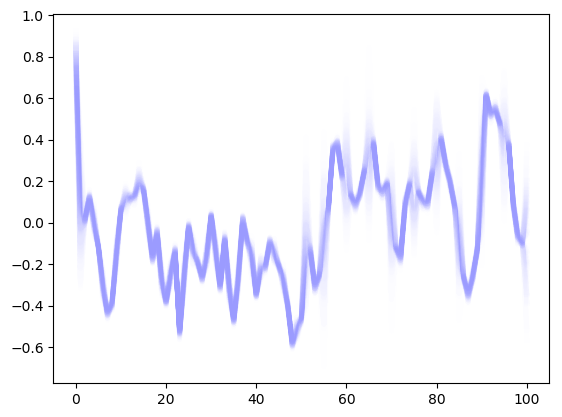

In [44]:
plt.plot(rand(q,100),color="blue", alpha=0.005, linewidth=4);

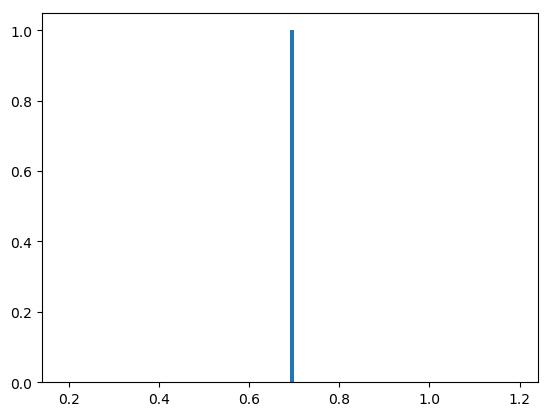

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  ‚Ä¶  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.1900854229977933, 0.2000854229977933, 0.2100854229977933, 0.2200854229977933, 0.2300854229977933, 0.24008542299779329, 0.2500854229977933, 0.2600854229977933, 0.2700854229977933, 0.28008542299779327  ‚Ä¶  1.1000854229977932, 1.1100854229977934, 1.1200854229977932, 1.1300854229977935, 1.1400854229977933, 1.1500854229977933, 1.1600854229977933, 1.1700854229977933, 1.1800854229977933, 1.1900854229977933], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x0000000064938940>, PyObject <matplotlib.patches.Rectangle object at 0x0000000064938710>, PyObject <matplotlib.patches.Rectangle object at 0x0000000064938F28>, PyObject <matplotlib.patches.Rectangle object at 0x0000000065BCC2B0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000065BCC5F8>, PyObject <matplotlib.patches.Rectangle object at 0x0000000065BCC940>, PyObject <matplotlib.patches.Rectangle object a

In [45]:
_, sym2range = Turing.Variational.bijector(model; sym_to_ranges = Val(true));

plt.hist(rand(q,1)[sym2range[:Œ∏1]...,:], bins=100)

# Turing test (1 AR coef & noise)

In [46]:
@model ARmodel(y, t, œÉn) = begin
    
    N = length(t)
    
    # specify AR coeficients
    Œ∏1 ~ Uniform(0, 1)
    #Œ∏2 ~ Uniform(0, 1)
    
    # specify std
    œÉ1 ~ InverseGamma(1,1)
    
    # specify prior on coefs
    s1 = Vector(undef, N)
    s3 = Vector(undef, N)
    x = Vector(undef, N)
    s1[1] ~ Normal(0, œÉ1)
    s3[1] ~ Normal(0, œÉ1)
    
    for n = 2:N
        s1[n] ~ Normal(Œ∏1*s1[n-1], œÉ1)
        s3[n] ~ Normal(Œ∏1*s3[n-1], œÉ1)
        x[n] = s1[n]*cos(2*pi*2*t[n]) + s3[n]*sin(2*pi*2*t[n])
        y[n] ~ Normal(x[n], œÉn)
    end
    return Œ∏1, œÉ1 #, #, Œ∏2, œÉ1, œÉ2
end
 

##ARmodel#746 (generic function with 2 methods)

In [47]:
model = ARmodel(yi,t, 0.01)
advi = ADVI(10, 1000)
q = vi(model, advi);

‚îå Info: [ADVI] Should only be seen once: optimizer created for Œ∏
‚îÇ   objectid(Œ∏) = 10896599470569503908
‚îî @ Turing.Variational C:\Users\s151781\.julia\packages\Turing\cReBm\src\variational\VariationalInference.jl:204
[ADVI] Optimizing...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| Time: 0:02:14


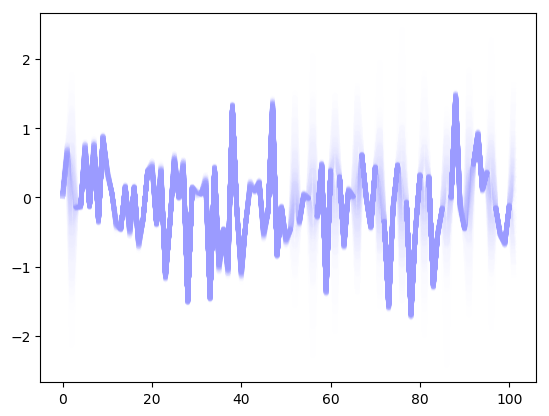

In [48]:
plt.plot(rand(q,100),color="blue", alpha=0.005, linewidth=4);

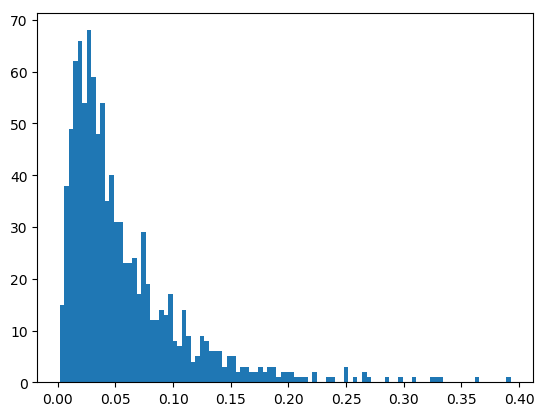

([15.0, 38.0, 49.0, 62.0, 66.0, 54.0, 68.0, 59.0, 48.0, 54.0  ‚Ä¶  0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0019250112969196036, 0.005833790209630331, 0.009742569122341059, 0.013651348035051785, 0.017560126947762513, 0.02146890586047324, 0.025377684773183966, 0.029286463685894694, 0.03319524259860542, 0.03710402151131615  ‚Ä¶  0.35762389235359576, 0.3615326712663065, 0.3654414501790172, 0.36935022909172793, 0.3732590080044387, 0.37716778691714936, 0.3810765658298601, 0.38498534474257085, 0.3888941236552816, 0.39280290256799233], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000006AFE97B8>, PyObject <matplotlib.patches.Rectangle object at 0x000000006AFE95C0>, PyObject <matplotlib.patches.Rectangle object at 0x000000006AFE9DD8>, PyObject <matplotlib.patches.Rectangle object at 0x000000006B24B160>, PyObject <matplotlib.patches.Rectangle object at 0x000000006B24B4A8>, PyObject <matplotlib.patches.Rectangle object at 0x000000006B24B7F0>, PyObject <matplo

In [49]:
_, sym2range = Turing.Variational.bijector(model; sym_to_ranges = Val(true));
samples = squeeze(rand(q,1000)[sym2range[:Œ∏1]...,:])
plt.hist(samples, bins=100) # should be 0.95

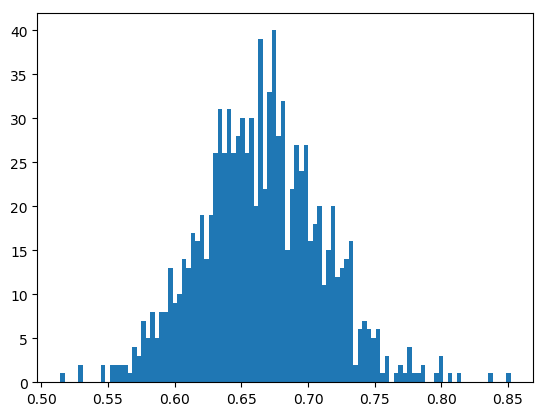

([1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0  ‚Ä¶  0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0], [0.5139580723709821, 0.5173408106236218, 0.5207235488762616, 0.5241062871289013, 0.5274890253815411, 0.5308717636341808, 0.5342545018868206, 0.5376372401394602, 0.5410199783921, 0.5444027166447397  ‚Ä¶  0.8217872533611978, 0.8251699916138375, 0.8285527298664773, 0.831935468119117, 0.8353182063717568, 0.8387009446243965, 0.8420836828770362, 0.845466421129676, 0.8488491593823158, 0.8522318976349554], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000006C88F518>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C88F320>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C88FB38>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C88FE80>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C89A208>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C89A550>, PyObject <matplotlib.patches.Rectangle object at 0x000

In [50]:
samples = squeeze(rand(q,1000)[sym2range[:œÉ1]...,:])
plt.hist(samples, bins=100) # should be 0.2

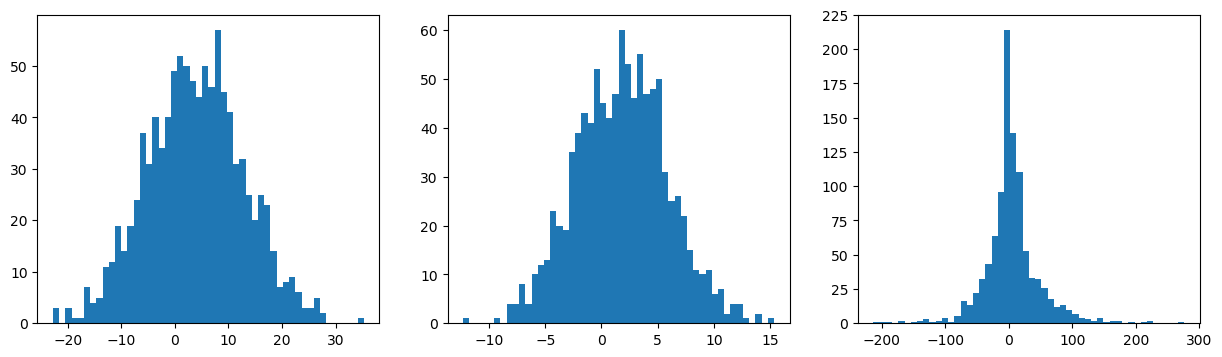

In [51]:
z1 = rand(Normal(4, 9), 1000)
z2 = rand(Normal(2, 4), 1000)
z3 = z1.*z2

_, ax = plt.subplots(ncols=3, figsize=(15,4))
ax[1].hist(z1, bins=50)
ax[2].hist(z2, bins=50)
ax[3].hist(z3, bins=50);

# Own implementation in FL (univariate case)

$$ s_{f,t} = \theta_f \cdot s_{f,t-1} + w_f $$
$$ w_f \sim \Gamma(a_f, b_f) $$

$$ S_t = \begin{bmatrix} \theta_1 \\ \theta_1 \\ \theta_2 \\ \theta_2 \\ \vdots \\ \theta_F \\ \theta_F \end{bmatrix} \circ S_{t-1} + {\bf{w}} $$
$$ {\bf{w}} \sim \mathcal{N}(0, W^{-1}) $$
$$ W = \begin{bmatrix} \gamma_1 \\ & \gamma_1 \\ & & \gamma_2 \\ & & & \gamma_2 \\ & & & & \ddots \\ & & & & & \gamma_F \\ & & & & & & \gamma_F\end{bmatrix}$$

In [52]:
mutable struct AutoregressiveFilterbank <: ForneyLab.SoftFactor
    id::Symbol
    interfaces::Vector{Interface}
    i::Dict{Symbol,Interface}

    function AutoregressiveFilterbank(y, x, Œ∏, Œ≥; id=ForneyLab.generateId(AutoregressiveFilterbank))
        @ensureVariables(y, x, Œ∏, Œ≥)
        self = new(id, Array{Interface}(undef, 4), Dict{Symbol,Interface}())
        ForneyLab.addNode!(currentGraph(), self)
        self.i[:y] = self.interfaces[1] = ForneyLab.associate!(Interface(self), y)
        self.i[:x] = self.interfaces[2] = ForneyLab.associate!(Interface(self), x)
        self.i[:Œ∏] = self.interfaces[3] = ForneyLab.associate!(Interface(self), Œ∏)
        self.i[:Œ≥] = self.interfaces[4] = ForneyLab.associate!(Interface(self), Œ≥)
        return self
    end
end
slug(::Type{AutoregressiveFilterbank}) = "ARFB"

slug (generic function with 1 method)

In [53]:
function ruleVariationalARFBOutNPPP(marg_y :: Nothing,
                                    marg_x :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_Œ∏ :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_Œ≥ :: ProbabilityDistribution{ForneyLab.Univariate})
    
    # calculate required means
    mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)
    mx = ForneyLab.unsafeMean(marg_x)
    mŒ≥ = ForneyLab.unsafeMean(marg_Œ≥)
    
    # calculate new parameters
    my = mŒ∏ * mx
    vy = 1/mŒ≥
    
    # create variational message
    Message(ForneyLab.Univariate, GaussianWeightedMeanPrecision, xi=my/vy, w=1/vy)
end

ruleVariationalARFBOutNPPP (generic function with 1 method)

In [54]:
function ruleVariationalARFBIn1PNPP(marg_y :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_x :: Nothing,
                                    marg_Œ∏ :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_Œ≥ :: ProbabilityDistribution{ForneyLab.Univariate})
    
    # calculate required means
    my = ForneyLab.unsafeMean(marg_y)
    mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)
    mŒ≥ = ForneyLab.unsafeMean(marg_Œ≥)
    
    # calculate required variances
    vŒ∏ = ForneyLab.unsafeCov(marg_Œ∏)
    
    # calculate new parameters
    mx = mŒ∏*my/(vŒ∏ + mŒ∏^2)
    vx = 1/(mŒ≥*(vŒ∏ + mŒ∏^2))
    
    # create variational message
    Message(ForneyLab.Univariate, GaussianWeightedMeanPrecision, xi=mx/vx, w=1/vx)
end

ruleVariationalARFBIn1PNPP (generic function with 1 method)

In [55]:
function ruleVariationalARFBIn2PPNP(marg_y :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_x :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_Œ∏ :: Nothing,
                                    marg_Œ≥ :: ProbabilityDistribution{ForneyLab.Univariate})
    
    # calculate required means
    my = ForneyLab.unsafeMean(marg_y)
    mx = ForneyLab.unsafeMean(marg_x)
    mŒ≥ = ForneyLab.unsafeMean(marg_Œ≥)
    
    # calculate required variances
    vx = ForneyLab.unsafeCov(marg_x)
    
    # calculate new parameters
    mŒ∏ = mx*my/(vx + mx^2)
    vŒ∏ = 1/(mŒ≥*(vx + mx^2))
    
    # create variational message
    Message(ForneyLab.Univariate, GaussianWeightedMeanPrecision, xi=mŒ∏/vŒ∏, w=1/vŒ∏)
end

ruleVariationalARFBIn2PPNP (generic function with 1 method)

In [56]:
function ruleVariationalARFBIn3PPPN(marg_y :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_x :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_Œ∏ :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_Œ≥ :: Nothing)
    
    # calculate required means
    my = ForneyLab.unsafeMean(marg_y)
    mx = ForneyLab.unsafeMean(marg_x)
    mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)
    
    # calculate required variances
    vy = ForneyLab.unsafeCov(marg_y)
    vx = ForneyLab.unsafeCov(marg_x)
    vŒ∏ = ForneyLab.unsafeCov(marg_Œ∏)
    
    # calculate new parameters
    a = 3/2
    b = 1/2*((vy + my^2) + (vŒ∏ + mŒ∏^2)*(vx + mx^2) - 2*mŒ∏*mx*my)
    
    # create variational message
    Message(ForneyLab.Gamma, a=a, b=b)
end

ruleVariationalARFBIn3PPPN (generic function with 1 method)

In [57]:
@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                      :inbound_types => (Nothing, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution),
                      :name          => VariationalARFBOutNPPP)


@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                      :inbound_types => (ProbabilityDistribution, Nothing, ProbabilityDistribution, ProbabilityDistribution),
                      :name          => VariationalARFBIn1PNPP)

@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                      :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, Nothing, ProbabilityDistribution),
                      :name          => VariationalARFBIn2PPNP)

@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{ForneyLab.Gamma},
                      :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, Nothing),
                      :name          => VariationalARFBIn3PPPN)

In [58]:
fg = FactorGraph()

@RV smin ~ GaussianMeanVariance(placeholder(:Œº_smin), placeholder(:Œ£_smin))
@RV Œ∏ ~ GaussianMeanVariance(placeholder(:Œº_Œ∏), placeholder(:Œ£_Œ∏))
@RV Œ≥ ~ ForneyLab.Gamma(placeholder(:a_Œ≥), placeholder(:b_Œ≥))
@RV s ~ AutoregressiveFilterbank(smin, Œ∏, Œ≥)
@RV x = s * placeholder(:c)
@RV y ~ GaussianMeanVariance(x, placeholder(:Œ£_x))
placeholder(y, :y)

q = PosteriorFactorization(smin, s, Œ∏, Œ≥, ids=[:smin :s :Œ∏ :Œ≥])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 17809111759840027410 -->
 17809111759840027410 
 
 placeholder_Œº_Œ∏ 
 
<!-- 7759986508018113098 -->
 7759986508018113098 
 
 placeholder_Œ£_smin 
 
<!-- 16999743314144588334 -->
 16999743314144588334 
 
 √ó 
 multiplication_1 
 
<!-- 11512811432902380324 -->
 11512811432902380324 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 16999743314144588334--11512811432902380324 -->
 16999743314144588334--11512811432902380324 
 
 s 
 1 y 
 3 a 
 
<!-- 13112089143361410021 -->
 13112089143361410021 
 
 placeholder_c 
 
<!-- 16999743314144588334--13112089143361410021 -->
 16999743314144588334--13112089143361410021 
 
 c 
 1 out 
 2 in1 
 
<!-- 6608245229280879477 -->
 6608245229280879477 
 
 ùí© 
 gaussianmeanvariance_3 
 
<!-- 6608245229280879477--16999743314144588334 -->
 6608245229280879477--16999743314144588334 
 
 x 
 1 out 
 2 m 
 
<!-- 16204225653130976960 -->
 16204225653130976960 
 
 placeholder_Œ£_x 
 
<!-- 6608245229280879477--16204225653130976960 -->
 6608245229280879477--16204225653130976960 
 
 Œ£_x 
 1 out 
 3 v 
 
<!-- 6143879867746012137 -->
 6143879867746012137 
 
 ùí© 
 gaussianmeanvariance_2 
 
<!-- 6143879867746012137--17809111759840027410 -->
 6143879867746012137--17809111759840027410 
 
 Œº_Œ∏ 
 1 out 
 2 m 
 
<!-- 13068585142756028920 -->
 13068585142756028920 
 
 placeholder_Œ£_Œ∏ 
 
<!-- 6143879867746012137--13068585142756028920 -->
 6143879867746012137--13068585142756028920 
 
 Œ£_Œ∏ 
 1 out 
 3 v 
 
<!-- 8522343664875366514 -->
 8522343664875366514 
 
 placeholder_a_Œ≥ 
 
<!-- 11457938406859493400 -->
 11457938406859493400 
 
 ùí© 
 gaussianmeanvariance_1 
 
<!-- 11457938406859493400--7759986508018113098 -->
 11457938406859493400--7759986508018113098 
 
 Œ£_smin 
 1 out 
 3 v 
 
<!-- 6011394343342312920 -->
 6011394343342312920 
 
 placeholder_Œº_smin 
 
<!-- 11457938406859493400--6011394343342312920 -->
 11457938406859493400--6011394343342312920 
 
 Œº_smin 
 1 out 
 2 m 
 
<!-- 10721318347371613519 -->
 10721318347371613519 
 
 placeholder_y 
 
<!-- 10721318347371613519--6608245229280879477 -->
 10721318347371613519--6608245229280879477 
 
 y 
 1 out 
 1 out 
 
<!-- 8016978218951872730 -->
 8016978218951872730 
 
 placeholder_b_Œ≥ 
 
<!-- 11512811432902380324--6143879867746012137 -->
 11512811432902380324--6143879867746012137 
 
 Œ∏ 
 1 out 
 3 Œ∏ 
 
<!-- 11512811432902380324--11457938406859493400 -->
 11512811432902380324--11457938406859493400 
 
 smin 
 1 out 
 2 x 
 
<!-- 2736858592814869317 -->
 2736858592814869317 
 
 Gam 
 gamma_1 
 
<!-- 11512811432902380324--2736858592814869317 -->
 11512811432902380324--2736858592814869317 
 
 Œ≥ 
 1 out 
 4 Œ≥ 
 
<!-- 2736858592814869317--8522343664875366514 -->
 2736858592814869317--8522343664875366514 
 
 a_Œ≥ 
 1 out 
 2 a 
 
<!-- 2736858592814869317--8016978218951872730 -->
 2736858592814869317--8016978218951872730 
 
 b_Œ≥ 
 1 out 
 3 b

In [59]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepŒ≥!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_Œ≥]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_Œ≥]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:Œ∏], nothing)

marginals[:Œ≥] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:Œ∏], marginals[:Œ≥])
messages[2] = ruleSPMultiplicationOutNPG(nothing, Message(ForneyLab.Univariate, PointMass, m=data[:c]), messages[1])
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:Œ£_x]))
messages[4

In [60]:
# signal statistics 
N = 5000
fs = 10

# process parameters
œÅ = 0.95
f = 2
œÉ_p = 0.2
œÉ_n = 0.01

# create signal (option 1)
si = Array{Float64,1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = œÅ*si[n-1] + rand(Normal(0, œÉ_p)) 
    xi[n] = si[n]*cos(2*pi*f/fs*n)
    yi[n] = rand(Normal(xi[n], œÉ_n))
end

t = collect(1:N)/fs
;

In [61]:
Œº_Œ∏_mem = Array{Float64,1}(undef, N)
Œ£_Œ∏_mem = Array{Float64,1}(undef, N)
m_Œ≥_mem = Array{Float64,1}(undef, N)

# priors
Œº_smin = 0
Œ£_smin = 0.1
Œº_Œ∏ = 0.5
Œ£_Œ∏ = 1
a_Œ≥ = 1
b_Œ≥ = 0.001
Œ£_x = 0.01*0.01
    
for n = 1:N
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(GaussianMeanVariance, m=Œº_smin, v=Œ£_smin)
    marginals[:Œ∏] = ProbabilityDistribution(GaussianMeanVariance, m=Œº_Œ∏, v=Œ£_Œ∏)
    marginals[:Œ≥] = ProbabilityDistribution(ForneyLab.Gamma, a=a_Œ≥, b=b_Œ≥)
    
    # fill data dictionary
    data = Dict()
    data[:Œº_smin] = Œº_smin
    data[:Œ£_smin] = Œ£_smin
    data[:Œº_Œ∏] = Œº_Œ∏
    data[:Œ£_Œ∏] = Œ£_Œ∏
    data[:a_Œ≥] = a_Œ≥
    data[:b_Œ≥] = b_Œ≥
    data[:c] = cos(2*pi*f*t[n])
    data[:Œ£_x] = Œ£_x
    data[:y] = yi[n]    
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepŒ≥!, data, marginals)
        Base.invokelatest(stepŒ∏!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    Œº_smin = ForneyLab.unsafeMean(marginals[:s])
    Œ£_smin = ForneyLab.unsafeCov(marginals[:s])
    Œº_Œ∏ = ForneyLab.unsafeMean(marginals[:Œ∏])
    Œ£_Œ∏ = ForneyLab.unsafeCov(marginals[:Œ∏])
    a_Œ≥ = marginals[:Œ≥].params[:a]
    b_Œ≥ = marginals[:Œ≥].params[:b]
    
    # save parameters
    Œº_Œ∏_mem[n] = Œº_Œ∏
    Œ£_Œ∏_mem[n] = Œ£_Œ∏
    m_Œ≥_mem[n] = a_Œ≥/b_Œ≥
    
end

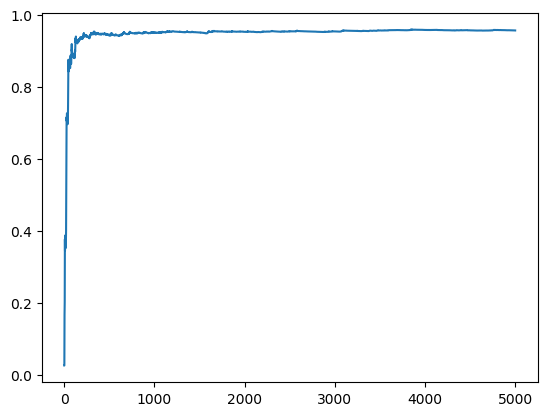

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001204550>

In [62]:
plt.plot(Œº_Œ∏_mem)

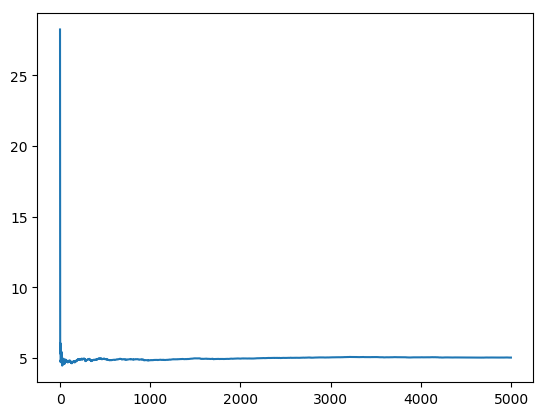

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E1D9470>

In [63]:
plt.plot(sqrt.(m_Œ≥_mem))

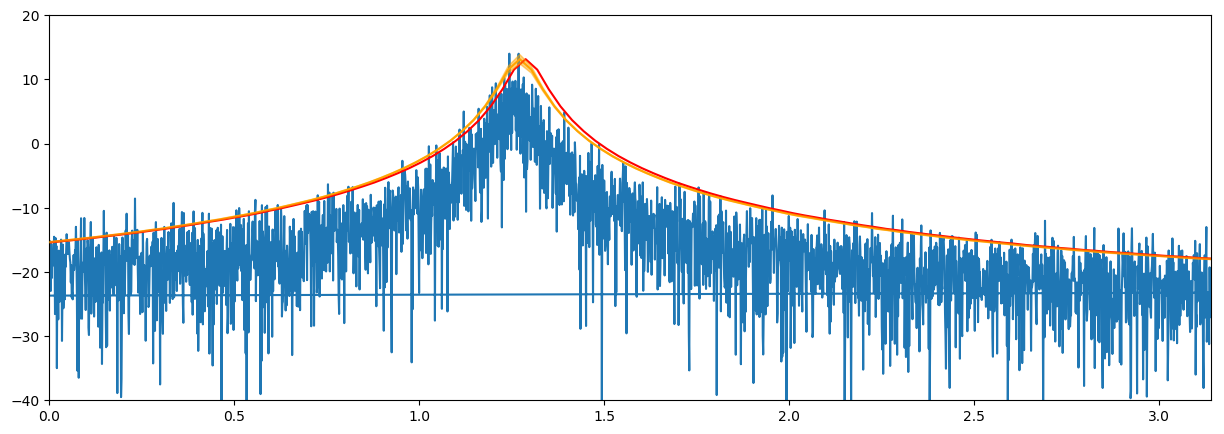

(0, 3.141592653589793)

In [64]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
Œ∏_sampled, Œ≥_sampled = AR_distributions([Œº_Œ∏], mat(1/Œ£_Œ∏), a_Œ≥, b_Œ≥)
mean_psd, std_psd = summary_psd(Œ∏_sampled, Œ≥_sampled)
mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
std_psd = vcat(reverse(std_psd), std_psd[2:end])
Œ∏x = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f/fs
gca().plot(Œ∏x, mean_psd, color="orange", label="predicted psd")
gca().fill_between(Œ∏x, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
tmp_psd = tmp_psd + 10 .^(mean_psd[100-Int(round(f/fs*200)):200-Int(round(f/fs*200))]/10)

gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 20)

plt.xlim(0,pi)

# Own implementation in FL (multivariate case)

In [65]:
mutable struct AutoregressiveFilterbankMV <: ForneyLab.SoftFactor
    id::Symbol
    interfaces::Vector{Interface}
    i::Dict{Symbol,Interface}

    function AutoregressiveFilterbankMV(y, x, Œ∏, Œ≥...; id=ForneyLab.generateId(AutoregressiveFilterbankMV))
        #@ensureVariables(y, x, Œ∏, Œ≥...)
        self = new(id, Array{Interface}(undef, 3 + length(Œ≥)), Dict{Symbol,Interface}())
        ForneyLab.addNode!(currentGraph(), self)
        self.i[:y] = self.interfaces[1] = ForneyLab.associate!(Interface(self), y)
        self.i[:x] = self.interfaces[2] = ForneyLab.associate!(Interface(self), x)
        self.i[:Œ∏] = self.interfaces[3] = ForneyLab.associate!(Interface(self), Œ∏)
        for k = 1:length(Œ≥)
            self.i[pad(:Œ≥,k)] = self.interfaces[3+k] = ForneyLab.associate!(Interface(self), Œ≥[k])
        end
        return self
    end
end
slug(::Type{AutoregressiveFilterbankMV}) = "ARFBMV"

slug (generic function with 2 methods)

In [66]:
function functionnames(nr_Œ≥, k)
    
    if k == 1
        name = "ruleVariationalARFBMVOutN"
        name = name*"P"^(nr_Œ≥+2)
    else
        name = "ruleVariationalARFBMVIn"*string(k-1)
        tmp = collect("P"^(nr_Œ≥+3))
        tmp[k] = 'N'
        tmp = String(tmp)
        name = name*tmp
    end
    
    return name

end

functionnames (generic function with 1 method)

In [67]:
function generatefunctions(nr_Œ≥)
    
    functions = Array{Expr}(undef, nr_Œ≥+3)

    
    for k = 1:nr_Œ≥+3
        
        if k == 1
            tmp = Symbol(functionnames(nr_Œ≥,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_Œ∏::MVprobnothing, marg_Œ≥...)
                    
                    mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)
                    mx = ForneyLab.unsafeMean(marg_x)
                    mŒ≥ = Array{Float64,1}(undef, length(mŒ∏))
                    for i = 1:length(mŒ≥)
                        mŒ≥[i] = ForneyLab.unsafeMean(marg_Œ≥[i])
                    end
                    
                    # calculate new parameters
                    my = mŒ∏ .* mx
                    vy = 1 ./ mŒ≥

                    # create variational message
                    return Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=my ./ vy, w=diagm(1 ./ vy))
                
                end
            end
            
         elseif k == 2
            tmp = Symbol(functionnames(nr_Œ≥,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_Œ∏::MVprobnothing, marg_Œ≥...)
                    
                    # calculate required means
                    my = ForneyLab.unsafeMean(marg_y)
                    mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)
                    mŒ≥ = Array{Float64,1}(undef, length(mŒ∏))
                    for i = 1:length(mŒ≥)
                        mŒ≥[i] = ForneyLab.unsafeMean(marg_Œ≥[i])
                    end

                    # calculate required variances
                    vŒ∏ = diag(ForneyLab.unsafeCov(marg_Œ∏))

                    # calculate new parameters
                    mx = mŒ∏.*my./(vŒ∏ + mŒ∏.^2)
                    vx = 1 ./(mŒ≥.*(vŒ∏ + mŒ∏.^2))

                    # create variational message
                    return Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=mx./vx, w=diagm(1 ./vx))
                
                end
            end 
                
        elseif k == 3
            tmp = Symbol(functionnames(nr_Œ≥,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_Œ∏::MVprobnothing, marg_Œ≥...)
                    
                    # calculate required means
                    my = ForneyLab.unsafeMean(marg_y)
                    mx = ForneyLab.unsafeMean(marg_x)
                    mŒ≥ = Array{Float64,1}(undef, length(my))
                    for i = 1:length(mŒ≥)
                        mŒ≥[i] = ForneyLab.unsafeMean(marg_Œ≥[i])
                    end

                    # calculate required variances
                    vx = diag(ForneyLab.unsafeCov(marg_x))

                    # calculate new parameters
                    mŒ∏ = mx.*my./(vx + mx.^2)
                    vŒ∏ = 1 ./(mŒ≥.*(vx + mx.^2))

                    # create variational message
                    Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=mŒ∏./vŒ∏, w=diagm(1 ./vŒ∏))
                
                end
            end
            
        else
            tmp = Symbol(functionnames(nr_Œ≥,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_Œ∏::MVprobnothing, marg_Œ≥...)
                    
                    # calculate required means
                    my = ForneyLab.unsafeMean(marg_y)
                    mx = ForneyLab.unsafeMean(marg_x)
                    mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)

                    # calculate required variances
                    vy = diag(ForneyLab.unsafeCov(marg_y))
                    vx = diag(ForneyLab.unsafeCov(marg_x))
                    vŒ∏ = diag(ForneyLab.unsafeCov(marg_Œ∏))

                    # calculate new parameters
                    a = 3/2
                    b = 1/2*((vy + my.^2) + (vŒ∏ + mŒ∏.^2).*(vx + mx.^2) - 2*mŒ∏.*mx.*my)[$k-3]

                    # create variational message
                    Message(ForneyLab.Gamma, a=a, b=b)
                
                end
            end
            
         end
        
    end
    
    return functions
    
end

generatefunctions (generic function with 1 method)

In [68]:
functions = generatefunctions(2)
MVprobnothing = Union{ProbabilityDistribution{ForneyLab.Multivariate},Nothing}
UVprobnothing = Union{ProbabilityDistribution{ForneyLab.Univariate},Nothing}
for k = 1:length(functions)
    eval(functions[k])
end
functions

5-element Array{Expr,1}:
 quote
    #= In[67]:11 =#
    function ruleVariationalARFBMVOutNPPPP(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_Œ∏::MVprobnothing, marg_Œ≥...)
        #= In[67]:13 =#
        mŒ∏ = ForneyLab.unsafeMean(marg_Œ∏)
        #= In[67]:14 =#
        mx = ForneyLab.unsafeMean(marg_x)
        #= In[67]:15 =#
        mŒ≥ = Array{Float64, 1}(undef, length(mŒ∏))
        #= In[67]:16 =#
        for i = 1:length(mŒ≥)
            #= In[67]:17 =#
            mŒ≥[i] = ForneyLab.unsafeMean(marg_Œ≥[i])
        end
        #= In[67]:21 =#
        my = mŒ∏ .* mx
        #= In[67]:22 =#
        vy = 1 ./ mŒ≥
        #= In[67]:25 =#
        return Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=my ./ vy, w=diagm(1 ./ vy))
    end
end                                                                                                               
 quote
    #= In[67]:33 =#
    function ruleVariationalARFBMVIn1PNPPP(marg_y::MVprobnothing, marg_x::MVprobnothing, 

In [69]:
# # make modular
# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{GaussianWeightedMeanPrecision},
#                       :inbound_types => (Nothing, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution),
#                       :name          => VariationalARFBMVOutNPPPP)


# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{GaussianWeightedMeanPrecision},
#                       :inbound_types => (ProbabilityDistribution, Nothing, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution),
#                       :name          => VariationalARFBMVIn1PNPPP)

# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{GaussianWeightedMeanPrecision},
#                       :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, Nothing, ProbabilityDistribution, ProbabilityDistribution),
#                       :name          => VariationalARFBMVIn2PPNPP)

# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{ForneyLab.Gamma},
#                       :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, Nothing, ProbabilityDistribution),
#                       :name          => VariationalARFBMVIn3PPPNP)

# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{ForneyLab.Gamma},
#                       :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, Nothing),
#                       :name          => VariationalARFBMVIn4PPPPN)

In [80]:
function generateFLfunctions(nr_Œ≥)
    
    functions = Array{Expr}(undef, nr_Œ≥+3)
    
    for k = 1:nr_Œ≥+3
        
        if k < 4
            tmp1 = "ProbabilityDistribution, "^(k-1)*"Nothing"*", ProbabilityDistribution"^(nr_Œ≥+3-k)
            tmp2 = Symbol(functionnames(nr_Œ≥,k)[5:end])
            functions[k] = quote
                
                @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
                                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                                      :inbound_types => $(Meta.parse(tmp1)),
                                      :name          => $tmp2)
                
            end
            
         else
            tmp1 = "ProbabilityDistribution, "^(k-1)*"Nothing"*", ProbabilityDistribution"^(nr_Œ≥+3-k)
            tmp2 = Symbol(functionnames(nr_Œ≥,k)[5:end])
            functions[k] = quote
                
                @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
                                      :outbound_type => Message{ForneyLab.Gamma},
                                      :inbound_types => $(Meta.parse(tmp1)),
                                      :name          => $tmp2)
                
            end
        end
                
    end
    
    return functions
    
end

generateFLfunctions (generic function with 1 method)

In [82]:
funcs = generateFLfunctions(2)
for k = 1:length(funcs)
    eval(funcs[k])
end

In [84]:
fg = FactorGraph()

@RV smin ~ GaussianMeanVariance(placeholder(:Œº_smin, dims=(2,)), placeholder(:Œ£_smin, dims=(2,2)))
@RV Œ∏ ~ GaussianMeanVariance(placeholder(:Œº_Œ∏, dims=(2,)), placeholder(:Œ£_Œ∏, dims=(2,2)))
@RV Œ≥1 ~ ForneyLab.Gamma(placeholder(pad(:a_Œ≥, 1)), placeholder(pad(:b_Œ≥,1)))
@RV Œ≥2 ~ ForneyLab.Gamma(placeholder(pad(:a_Œ≥, 2)), placeholder(pad(:b_Œ≥,2)))
@RV s ~ AutoregressiveFilterbankMV(smin, Œ∏, Œ≥1, Œ≥2)
@RV x = placeholder(:c, dims=(3,2)) * s
@RV y ~ GaussianMeanVariance(x, placeholder(:Œ£_x, dims=(3,3)))
placeholder(y, :y, dims=(3,))

q = PosteriorFactorization(smin, s, Œ∏, Œ≥1, Œ≥2, ids=[:smin :s :Œ∏ pad(:Œ≥,1) pad(:Œ≥,2)])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 15056447127015117002 -->
 15056447127015117002 
 
 √ó 
 multiplication_1 
 
<!-- 16371116797806449309 -->
 16371116797806449309 
 
 AutoregressiveFilterbankMV 
 autoregressivefilterbankmv_1 
 
<!-- 15056447127015117002--16371116797806449309 -->
 15056447127015117002--16371116797806449309 
 
 s 
 1 y 
 2 in1 
 
<!-- 8821826220851385664 -->
 8821826220851385664 
 
 placeholder_c 
 
<!-- 15056447127015117002--8821826220851385664 -->
 15056447127015117002--8821826220851385664 
 
 c 
 1 out 
 3 a 
 
<!-- 13406789259840763374 -->
 13406789259840763374 
 
 placeholder_b_Œ≥_02 
 
<!-- 7396657598512242501 -->
 7396657598512242501 
 
 placeholder_a_Œ≥_02 
 
<!-- 7366503556530966039 -->
 7366503556530966039 
 
 placeholder_b_Œ≥_01 
 
<!-- 3547741555890999909 -->
 3547741555890999909 
 
 Gam 
 gamma_2 
 
<!-- 16371116797806449309--3547741555890999909 -->
 16371116797806449309--3547741555890999909 
 
 Œ≥2 
 1 out 
 5 Œ≥_02 
 
<!-- 17213267369201460224 -->
 17213267369201460224 
 
 Gam 
 gamma_1 
 
<!-- 16371116797806449309--17213267369201460224 -->
 16371116797806449309--17213267369201460224 
 
 Œ≥1 
 1 out 
 4 Œ≥_01 
 
<!-- 17759269186506337021 -->
 17759269186506337021 
 
 ùí© 
 gaussianmeanvariance_1 
 
<!-- 16371116797806449309--17759269186506337021 -->
 16371116797806449309--17759269186506337021 
 
 smin 
 1 out 
 2 x 
 
<!-- 12331415145233803862 -->
 12331415145233803862 
 
 ùí© 
 gaussianmeanvariance_2 
 
<!-- 16371116797806449309--12331415145233803862 -->
 16371116797806449309--12331415145233803862 
 
 Œ∏ 
 1 out 
 3 Œ∏ 
 
<!-- 3547741555890999909--13406789259840763374 -->
 3547741555890999909--13406789259840763374 
 
 b_Œ≥_02 
 1 out 
 3 b 
 
<!-- 3547741555890999909--7396657598512242501 -->
 3547741555890999909--7396657598512242501 
 
 a_Œ≥_02 
 1 out 
 2 a 
 
<!-- 3324269983558396925 -->
 3324269983558396925 
 
 ùí© 
 gaussianmeanvariance_3 
 
<!-- 3324269983558396925--15056447127015117002 -->
 3324269983558396925--15056447127015117002 
 
 x 
 1 out 
 2 m 
 
<!-- 2455758709593414957 -->
 2455758709593414957 
 
 placeholder_Œ£_x 
 
<!-- 3324269983558396925--2455758709593414957 -->
 3324269983558396925--2455758709593414957 
 
 Œ£_x 
 1 out 
 3 v 
 
<!-- 17697698627640523037 -->
 17697698627640523037 
 
 placeholder_Œº_Œ∏ 
 
<!-- 17213267369201460224--7366503556530966039 -->
 17213267369201460224--7366503556530966039 
 
 b_Œ≥_01 
 1 out 
 3 b 
 
<!-- 16605159296792702034 -->
 16605159296792702034 
 
 placeholder_a_Œ≥_01 
 
<!-- 17213267369201460224--16605159296792702034 -->
 17213267369201460224--16605159296792702034 
 
 a_Œ≥_01 
 1 out 
 2 a 
 
<!-- 5399957059353043378 -->
 5399957059353043378 
 
 placeholder_Œº_smin 
 
<!-- 17759269186506337021--5399957059353043378 -->
 17759269186506337021--5399957059353043378 
 
 Œº_smin 
 1 out 
 2 m 
 
<!-- 18257119146849684096 -->
 18257119146849684096 
 
 placeholder_Œ£_smin 
 
<!-- 17759269186506337021--18257119146849684096 -->
 17759269186506337021--18257119146849684096 
 
 Œ£_smin 
 1 out 
 3 v 
 
<!-- 10173061757159184903 -->
 10173061757159184903 
 
 placeholder_y 
 
<!-- 10173061757159184903--3324269983558396925 -->
 10173061757159184903--3324269983558396925 
 
 y 
 1 out 
 1 out 
 
<!-- 15497764296831463477 -->
 15497764296831463477 
 
 placeholder_Œ£_Œ∏ 
 
<!-- 12331415145233803862--17697698627640523037 -->
 12331415145233803862--17697698627640523037 
 
 Œº_Œ∏ 
 1 out 
 2 m 
 
<!-- 12331415145233803862--15497764296831463477 -->
 12331415145233803862--15497764296831463477 
 
 Œ£_Œ∏ 
 1 out 
 3 v

In [85]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBMVOutNPPPP(nothing, marginals[:smin], marginals[:Œ∏], marginals[:Œ≥1], marginals[:Œ≥2])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(MatrixVariate, PointMass, m=data[:Œ£_x]))
messages[4] = ruleSPMultiplicationIn1GNP(messages[3], nothing, Message(MatrixVariate, PointMass, m=data[:c]))

marginals[:s] = messages[1].dist * messages[4].dist
marginals[:x] = messages[2].dist * messages[3].dist

return marginals

end

function stepŒ≥_02!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_Œ≥_02]), Probab

In [100]:
# signal statistics 
N = 5000
fs = 10

# process parameters
œÅ1 = 0.999
œÅ2 = 0.9
f1 = 2
f2 = 3.5
œÉ_p1 = 0.2
œÉ_p2 = 0.3
œÉ_n = 0.01

# create signal (option 1)
si1 = Array{Float64,1}(undef, N)
si2 = Array{Float64,1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si1[1] = 0 
si2[1] = 0 
xi[1] = 0
yi[1] = 0
for n = 2:N
    si1[n] = œÅ1*si1[n-1] + rand(Normal(0, œÉ_p1)) 
    si2[n] = œÅ2*si2[n-1] + rand(Normal(0, œÉ_p2)) 
    xi[n] = si1[n]*cos(2*pi*f1/fs*n) + si2[n]*cos(2*pi*f2/fs*n)
    yi[n] = rand(Normal(xi[n], œÉ_n))
end

t = collect(1:N)/fs
;

In [101]:
Œº_Œ∏_mem = Array{Float64,2}(undef, N,2)
Œ£_Œ∏_mem = Array{Float64,2}(undef, N,2)
m_Œ≥1_mem = Array{Float64,1}(undef, N)
m_Œ≥2_mem = Array{Float64,1}(undef, N)

# priors
Œº_smin = [0.0, 0.0]
Œ£_smin = 0.1*Ic(2)
Œº_Œ∏ = [0.5, 0.5]
Œ£_Œ∏ = 0.1*Ic(2)
a_Œ≥1 = 1
b_Œ≥1 = 0.001
a_Œ≥2 = 1
b_Œ≥2 = 0.001
Œ£_x = 0.01*0.01
    
for n = 3:N
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_smin, v=Œ£_smin)
    marginals[:Œ∏] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_Œ∏, v=Œ£_Œ∏)
    marginals[:Œ≥1] = ProbabilityDistribution(ForneyLab.Gamma, a=a_Œ≥1, b=b_Œ≥1)
    marginals[:Œ≥2] = ProbabilityDistribution(ForneyLab.Gamma, a=a_Œ≥2, b=b_Œ≥2)
    
    # fill data dictionary
    data = Dict()
    data[:Œº_smin] = Œº_smin
    data[:Œ£_smin] = Œ£_smin
    data[:Œº_Œ∏] = Œº_Œ∏
    data[:Œ£_Œ∏] = Œ£_Œ∏
    data[pad(:a_Œ≥,1)] = a_Œ≥1
    data[pad(:b_Œ≥,1)] = b_Œ≥1
    data[pad(:a_Œ≥,2)] = a_Œ≥2
    data[pad(:b_Œ≥,2)] = b_Œ≥2
    tmp = [cos(2*pi*f1*t[n]) cos(2*pi*f2*t[n])
           cos(2*pi*f1*t[n-1]) cos(2*pi*f2*t[n-1])
           cos(2*pi*f1*t[n-2]) cos(2*pi*f2*t[n-2])]
    data[:c] = tmp#transpose(reshape(tmp, (size(tmp)...,1)))
    data[:Œ£_x] = Œ£_x*Ic(3)
    data[:y] = [yi[n], yi[n-1], yi[n-2]]    
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepŒ∏!, data, marginals)
        Base.invokelatest(stepŒ≥_01!, data, marginals)
        Base.invokelatest(stepŒ≥_02!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    Œº_smin = ForneyLab.unsafeMean(marginals[:s])
    Œ£_smin = ForneyLab.unsafeCov(marginals[:s])
    Œº_Œ∏ = ForneyLab.unsafeMean(marginals[:Œ∏])
    Œ£_Œ∏ = ForneyLab.unsafeCov(marginals[:Œ∏])
    a_Œ≥1 = marginals[:Œ≥1].params[:a]
    b_Œ≥1 = marginals[:Œ≥1].params[:b]
    a_Œ≥2 = marginals[:Œ≥2].params[:a]
    b_Œ≥2 = marginals[:Œ≥2].params[:b]

    # save parameters
    Œº_Œ∏_mem[n,:] = Œº_Œ∏
    Œ£_Œ∏_mem[n,:] = diag(Œ£_Œ∏)
    m_Œ≥1_mem[n] = a_Œ≥1/b_Œ≥1
    m_Œ≥2_mem[n] = a_Œ≥2/b_Œ≥2
    
end

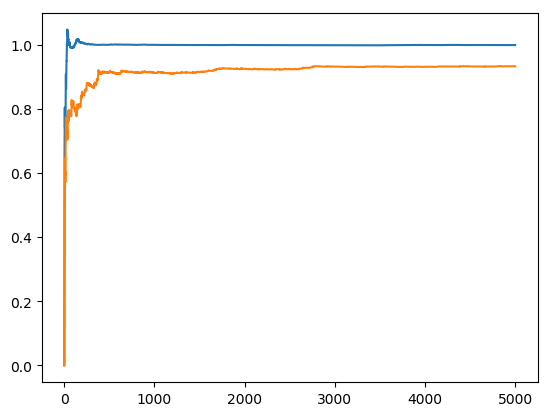

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E383FD0>
 PyObject <matplotlib.lines.Line2D object at 0x000000006E383710>

In [102]:
plt.plot(Œº_Œ∏_mem)

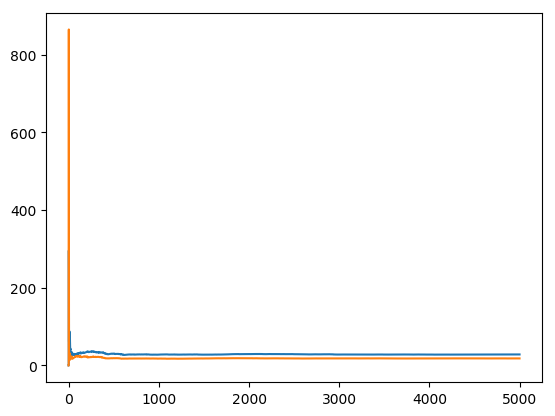

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006AE91198>

In [103]:
plt.plot(m_Œ≥1_mem)
plt.plot(m_Œ≥2_mem)

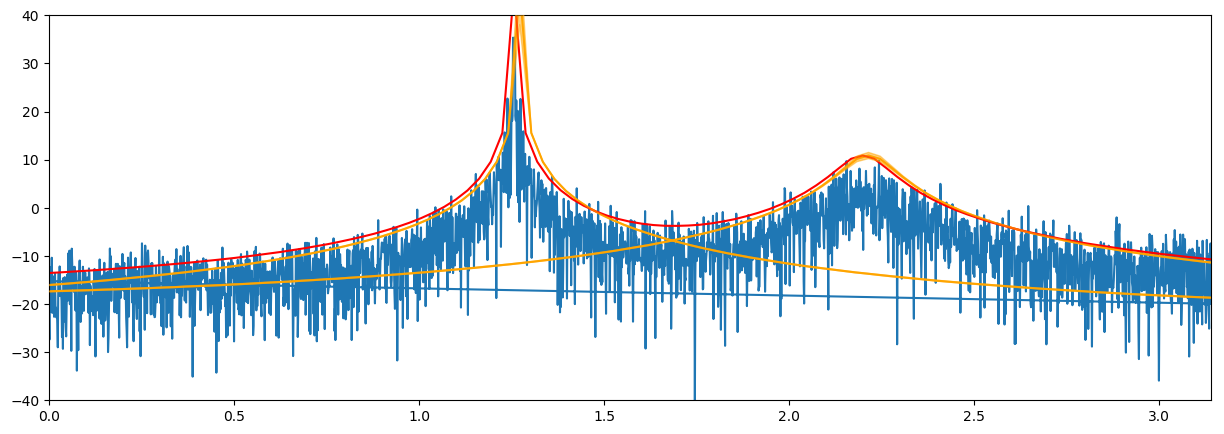

(0, 3.141592653589793)

In [104]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

a_Œ≥ = [a_Œ≥1, a_Œ≥2]
b_Œ≥ = [b_Œ≥1, b_Œ≥2]
f = [f1, f2]

tmp_psd = zeros(101)
for k = 1:2
    Œ∏_sampled, Œ≥_sampled = AR_distributions([Œº_Œ∏_mem[end,k]], mat(1/Œ£_Œ∏_mem[end,k]), a_Œ≥[k], b_Œ≥[k])
    mean_psd, std_psd = summary_psd(Œ∏_sampled, Œ≥_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    Œ∏x = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(Œ∏x, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(Œ∏x, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(f[k]/fs*200)):201-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 40)

plt.xlim(0,pi)